# Some initail data exploration
This notebook takes an inital look at the Mercedes-Benz Kaggle data. Competion @: https://www.kaggle.com/c/mercedes-benz-greener-manufacturing 
Use of data subject to conditions mentioned in above link.

In [90]:
%matplotlib inline
import numpy as np
import pandas as pd
import re
import seaborn as sns
import operator
import string
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV, ElasticNetCV, LogisticRegressionCV
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

## 1. Load the data sets

In [12]:
df_train = pd.read_csv('../data/train.csv').drop(['ID'],1).fillna(0)
df_train = df_train[df_train['y'] < 200] # drop one outlier data

In [13]:
df_train.head(5)

y  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...   X375  X376  X377  X378  X379  \
0  130.81   k  v  at  a  d  u  j  o    0  ...      0     0     1     0     0   
1   88.53   k  t  av  e  d  y  l  o    0  ...      1     0     0     0     0   
2   76.26  az  w   n  c  d  x  j  x    0  ...      0     0     0     0     0   
3   80.62  az  t   n  f  d  x  l  e    0  ...      0     0     0     0     0   
4   78.02  az  v   n  f  d  h  d  n    0  ...      0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 377 columns]

377 columns, by the looks loads of binary in there. First  aquick function to display all lines

In [4]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [5]:
print_full(df_train.max())

y       169.91
X0           z
X1           z
X2           z
X3           g
X4           d
X5           y
X6           l
X8           y
X10          1
X11          0
X12          1
X13          1
X14          1
X15          1
X16          1
X17          1
X18          1
X19          1
X20          1
X21          1
X22          1
X23          1
X24          1
X26          1
X27          1
X28          1
X29          1
X30          1
X31          1
X32          1
X33          1
X34          1
X35          1
X36          1
X37          1
X38          1
X39          1
X40          1
X41          1
X42          1
X43          1
X44          1
X45          1
X46          1
X47          1
X48          1
X49          1
X50          1
X51          1
X52          1
X53          1
X54          1
X55          1
X56          1
X57          1
X58          1
X59          1
X60          1
X61          1
X62          1
X63          1
X64          1
X65          1
X66          1
X67          1
X68       

Looks like there a few binary columns that have only 0 values: X11, X93, X107, X233, X235, X268, X289, X290, X293, X330, X347.
Let's load the test data and see there as well.


In [14]:
df_test = pd.read_csv('../data/test.csv', index_col = 'ID').fillna(0)

In [7]:
print_full(df_test.max())

X0      z
X1      z
X2      z
X3      g
X4      d
X5      z
X6      l
X8      y
X10     1
X11     1
X12     1
X13     1
X14     1
X15     1
X16     1
X17     1
X18     1
X19     1
X20     1
X21     1
X22     1
X23     1
X24     1
X26     1
X27     1
X28     1
X29     1
X30     1
X31     1
X32     1
X33     1
X34     1
X35     1
X36     1
X37     1
X38     1
X39     1
X40     1
X41     1
X42     1
X43     1
X44     1
X45     1
X46     1
X47     1
X48     1
X49     1
X50     1
X51     1
X52     1
X53     1
X54     1
X55     1
X56     1
X57     1
X58     1
X59     1
X60     1
X61     1
X62     1
X63     1
X64     1
X65     1
X66     1
X67     1
X68     1
X69     1
X70     1
X71     1
X73     1
X74     1
X75     1
X76     1
X77     1
X78     1
X79     1
X80     1
X81     1
X82     1
X83     1
X84     1
X85     1
X86     1
X87     1
X88     1
X89     1
X90     1
X91     1
X92     1
X93     1
X94     1
X95     1
X96     1
X97     1
X98     1
X99     1
X100    1
X101    1
X102    1
X103    1


Nope, others that have 0, but not the same ones. Early guess: These are rare features.
How many datasets in test?

In [8]:
df_test.shape

(4209, 376)

In [9]:
print_full(df_train.mean())

y       100.630190
X10       0.013308
X11       0.000000
X12       0.075095
X13       0.057985
X14       0.428232
X15       0.000475
X16       0.002614
X17       0.007605
X18       0.007842
X19       0.099335
X20       0.142823
X21       0.002614
X22       0.086977
X23       0.020675
X24       0.001901
X26       0.004990
X27       0.682510
X28       0.032557
X29       0.043013
X30       0.004515
X31       0.232177
X32       0.011169
X33       0.000238
X34       0.005466
X35       0.232177
X36       0.004515
X37       0.232177
X38       0.033270
X39       0.000238
X40       0.000713
X41       0.011407
X42       0.000238
X43       0.072243
X44       0.011407
X45       0.253327
X46       0.597196
X47       0.012833
X48       0.022338
X49       0.122148
X50       0.214116
X51       0.721958
X52       0.042300
X53       0.006892
X54       0.043489
X55       0.005228
X56       0.021150
X57       0.013308
X58       0.574857
X59       0.000713
X60       0.001426
X61       0.953897
X62       0.

## 2. Let's visualize the data
### First the mean of the binary data

In [10]:
li_columnNames = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
df_display = df_train[li_columnNames].mean().copy()

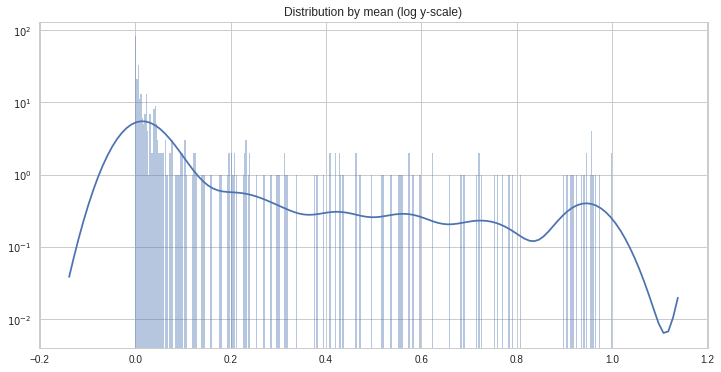

In [11]:
plt.rcParams["figure.figsize"] = (12,6)
sns.set_style('whitegrid')
dist_plot = sns.distplot(df_display, bins=368)
plt.yscale('log')
dist_plot.set_title('Distribution by mean (log y-scale)')
plt.show()

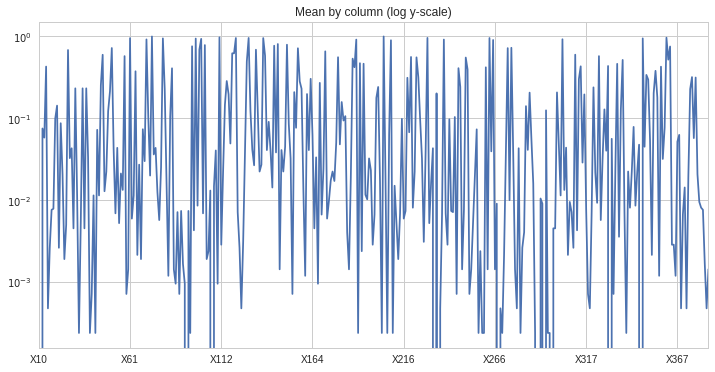

In [12]:
df_display.plot(title = 'Mean by column (log y-scale)', logy = True)
#plt.yscale('log')
plt.show()

Some non-binary data visualizations. Also add a new column with the quantity of 1s over the binary columns.

In [13]:
li_columnNames2 = [e for e in list(df_train.columns.values) if e in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
df_display = df_train[li_columnNames2].copy()
df_display['qty_options'] = df_train[li_columnNames].sum(axis=1)
df_display.head(5)

y  X0 X1  X2 X3 X4 X5 X6 X8  qty_options
0  130.81   k  v  at  a  d  u  j  o           52
1   88.53   k  t  av  e  d  y  l  o           52
2   76.26  az  w   n  c  d  x  j  x           73
3   80.62  az  t   n  f  d  x  l  e           62
4   78.02  az  v   n  f  d  h  d  n           58

In [14]:
list_temp = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
list_value = list(string.lowercase) + list('a' + x for x in list(string.lowercase)) + ['ba', 'bb', 'bc']
i = 0
value_to_int = {}
for j in list_value:
    value_to_int[j] = i
    i += 1
df_display = df_display.replace(value_to_int)

In [15]:
df_display[['X8', 'qty_options', 'y']].head(10)

X8  qty_options       y
0  14           52  130.81
1  14           52   88.53
2  23           73   76.26
3   4           62   80.62
4  13           58   78.02
5  18           53   92.93
6  18           53  128.76
7   0           62   91.91
8   7           70  108.67
9   4           63  126.99

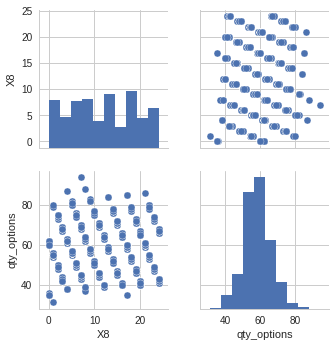

In [16]:
sns.pairplot(df_display, vars=['X8', 'qty_options'])
plt.show()

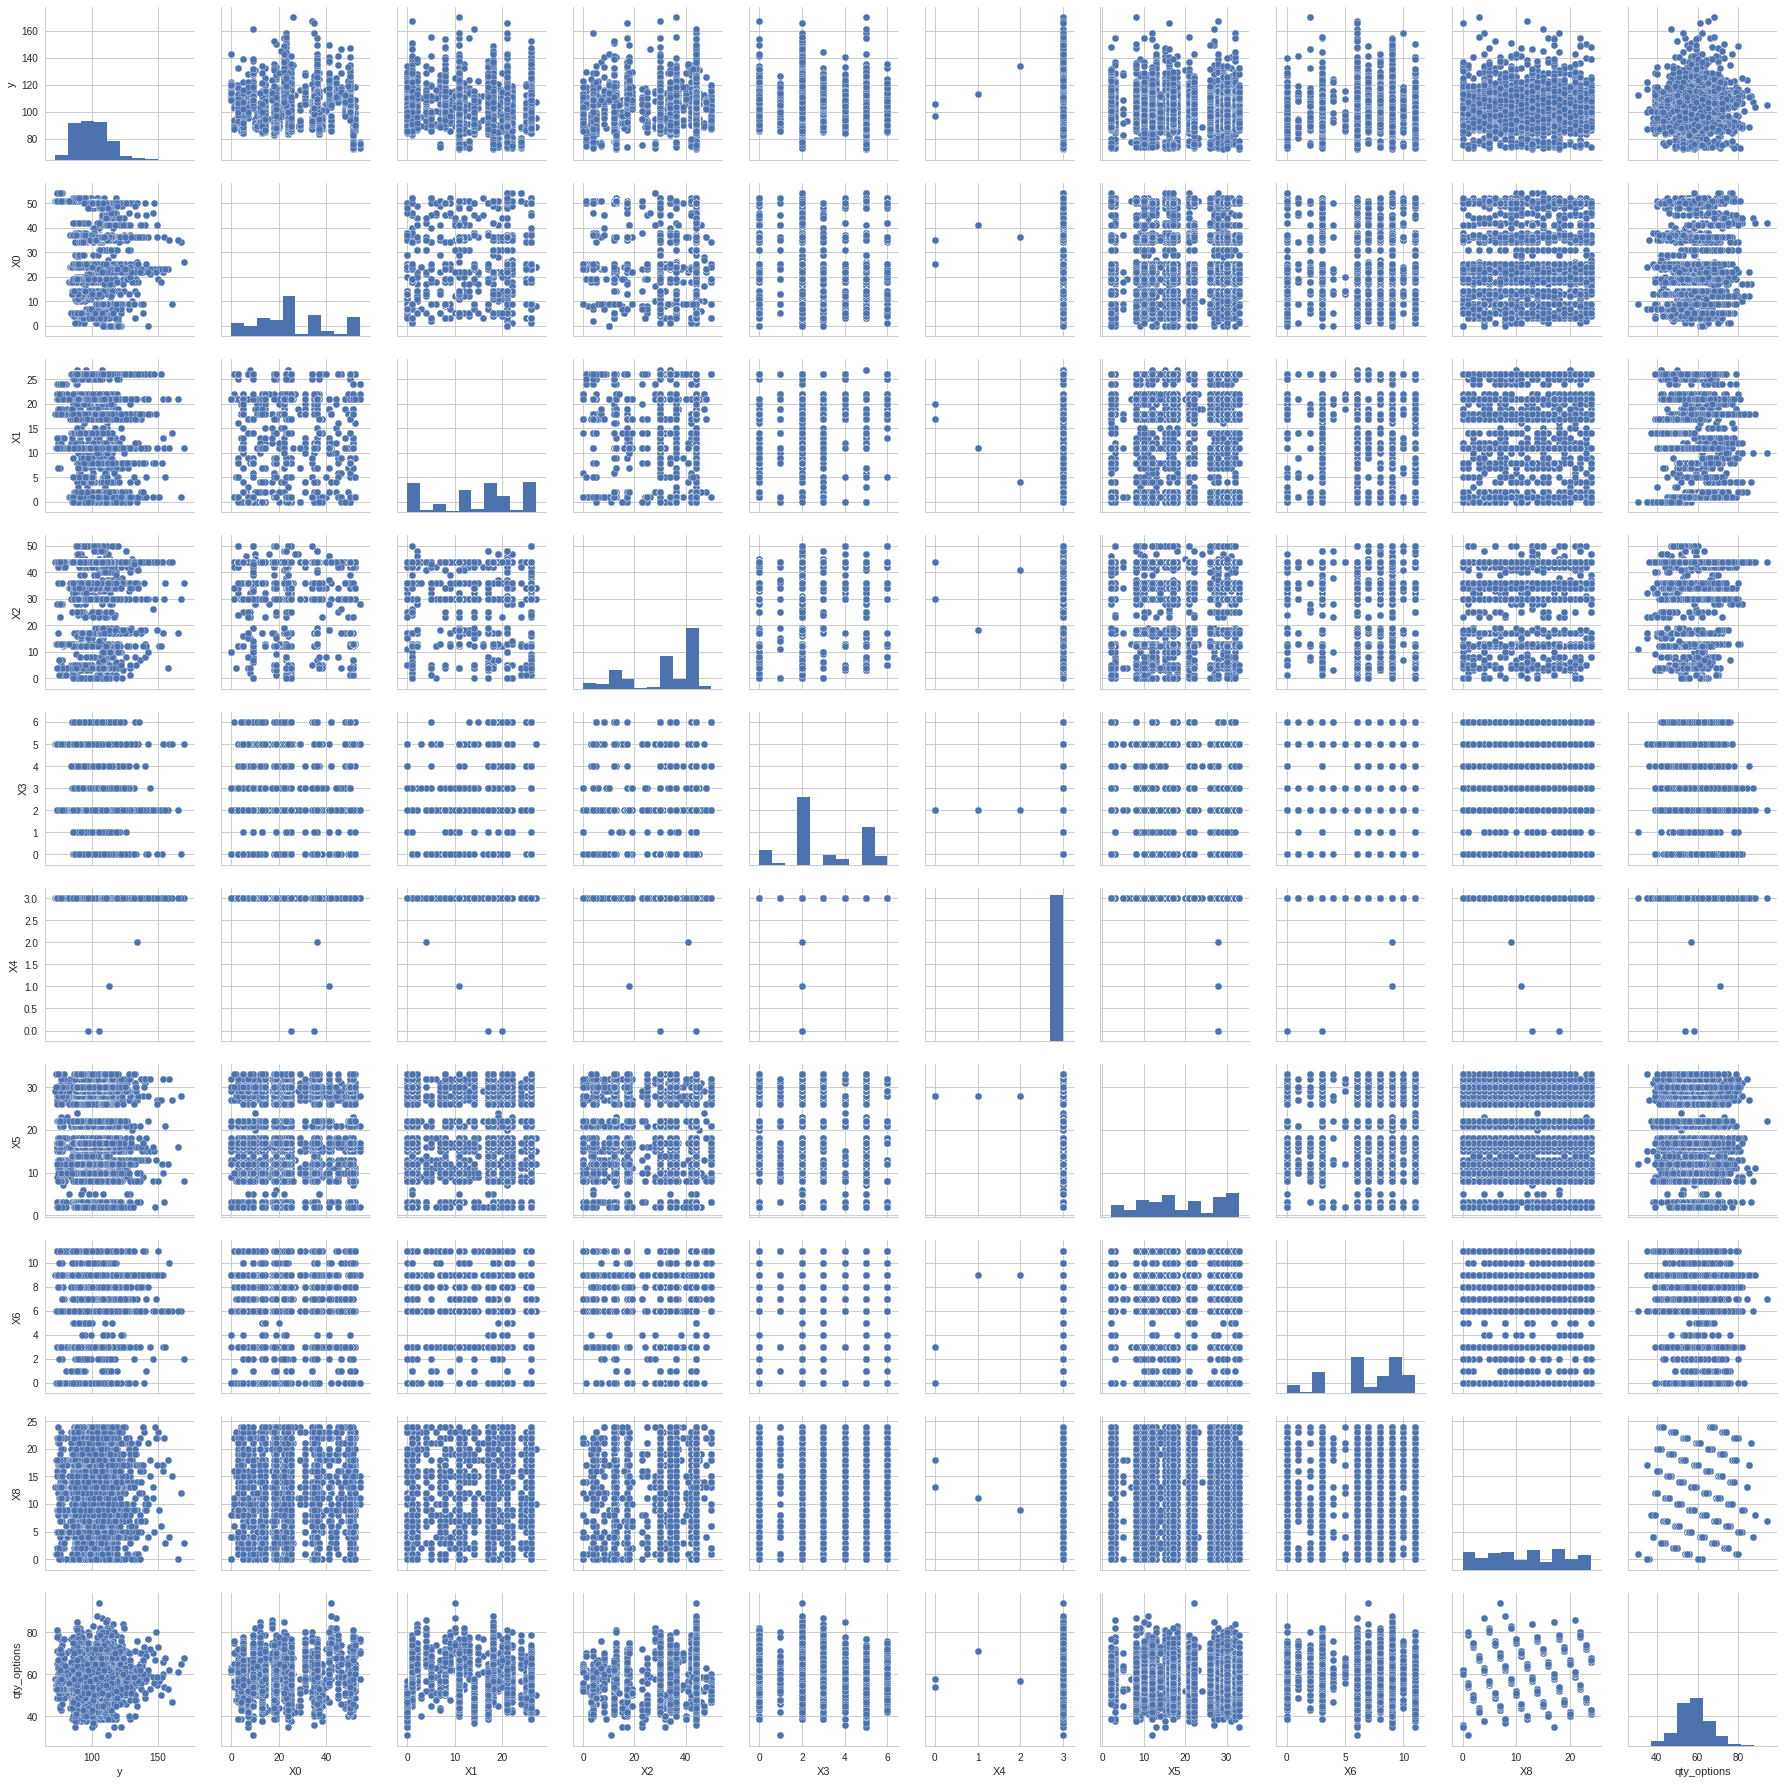

In [17]:
sns.set()
sns.set_style('whitegrid')
sns.pairplot(df_display)
plt.show()

In [18]:
df_display.describe()

y           X0           X1           X2           X3  \
count  4208.000000  4208.000000  4208.000000  4208.000000  4208.000000   
mean    100.630190    25.297529    14.560124    31.906606     2.919202   
std      12.424146    13.906061     8.865913    13.684710     1.739823   
min      72.110000     0.000000     0.000000     0.000000     0.000000   
25%      90.817500    14.000000     8.000000    18.000000     2.000000   
50%      99.150000    23.000000    17.000000    36.000000     2.000000   
75%     109.010000    36.000000    21.000000    44.000000     5.000000   
max     169.910000    54.000000    27.000000    50.000000     6.000000   

                X4           X5           X6           X8  qty_options  
count  4208.000000  4208.000000  4208.000000  4208.000000  4208.000000  
mean      2.997861    18.588641     6.806321    11.609553    58.025665  
std       0.073909     9.039161     2.916603     7.037802     7.784005  
min       0.000000     2.000000     0.000000     0.000000    31.000000  
25%       3.000000    11.000000     6.000000     5.000000    53.000000  
50%       3.000000    17.000000     7.000000    11.000000    58.000000  
75%       3.000000    28.000000     9.000000    18.000000    63.000000  
max       3.000000    33.000000    11.000000    24.000000    94.000000

So after droping one outlier and some initial data wrangling, some observations:
### Data reconstruction:
Consider data wrangling on a per column basis, not generic. This way an either normal or log distribution of the values should be more realisticly achievable:
- X0 should be wide normal achievable
- X1 dito
- X5 dito
- X6 dito
- X8 dito (while watching that pattern in conjunction with qty_options)
- X2 should be log achievable
- X3 dito
- X4 dito

### remarkable observations (from graphics):
- all non-'3' values of X4 coincite with X3 = 2 an X6 around 27?
- pattern X8 - qty_options
- seems like the y distribution is really low, followed by a less populated area, then populated with a gradually extending tale to the upper end. Worth having a closer look. The lower end seems to corelated with X0 in the high 40s, only a few values in X1 and X3 = 2 or 5 

## Correlation matrix:

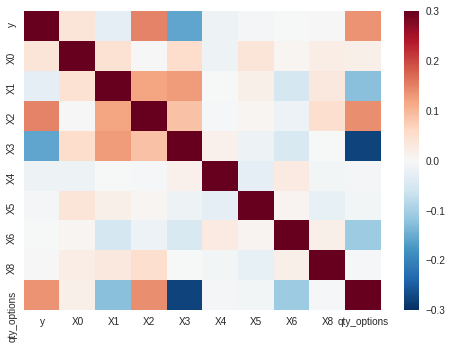

In [19]:
corr = df_display.corr()
sns.heatmap(df_display.corr(), vmax=.3)
plt.show()

The correlation matrix confirms the earlier observation: strong neg. corr. y - X3, neg. corr X1 - y, pos. X0 - y, strong positive X2 - y and qty_options - y

## So far have been considering train data, let's confirm similar observations within test data

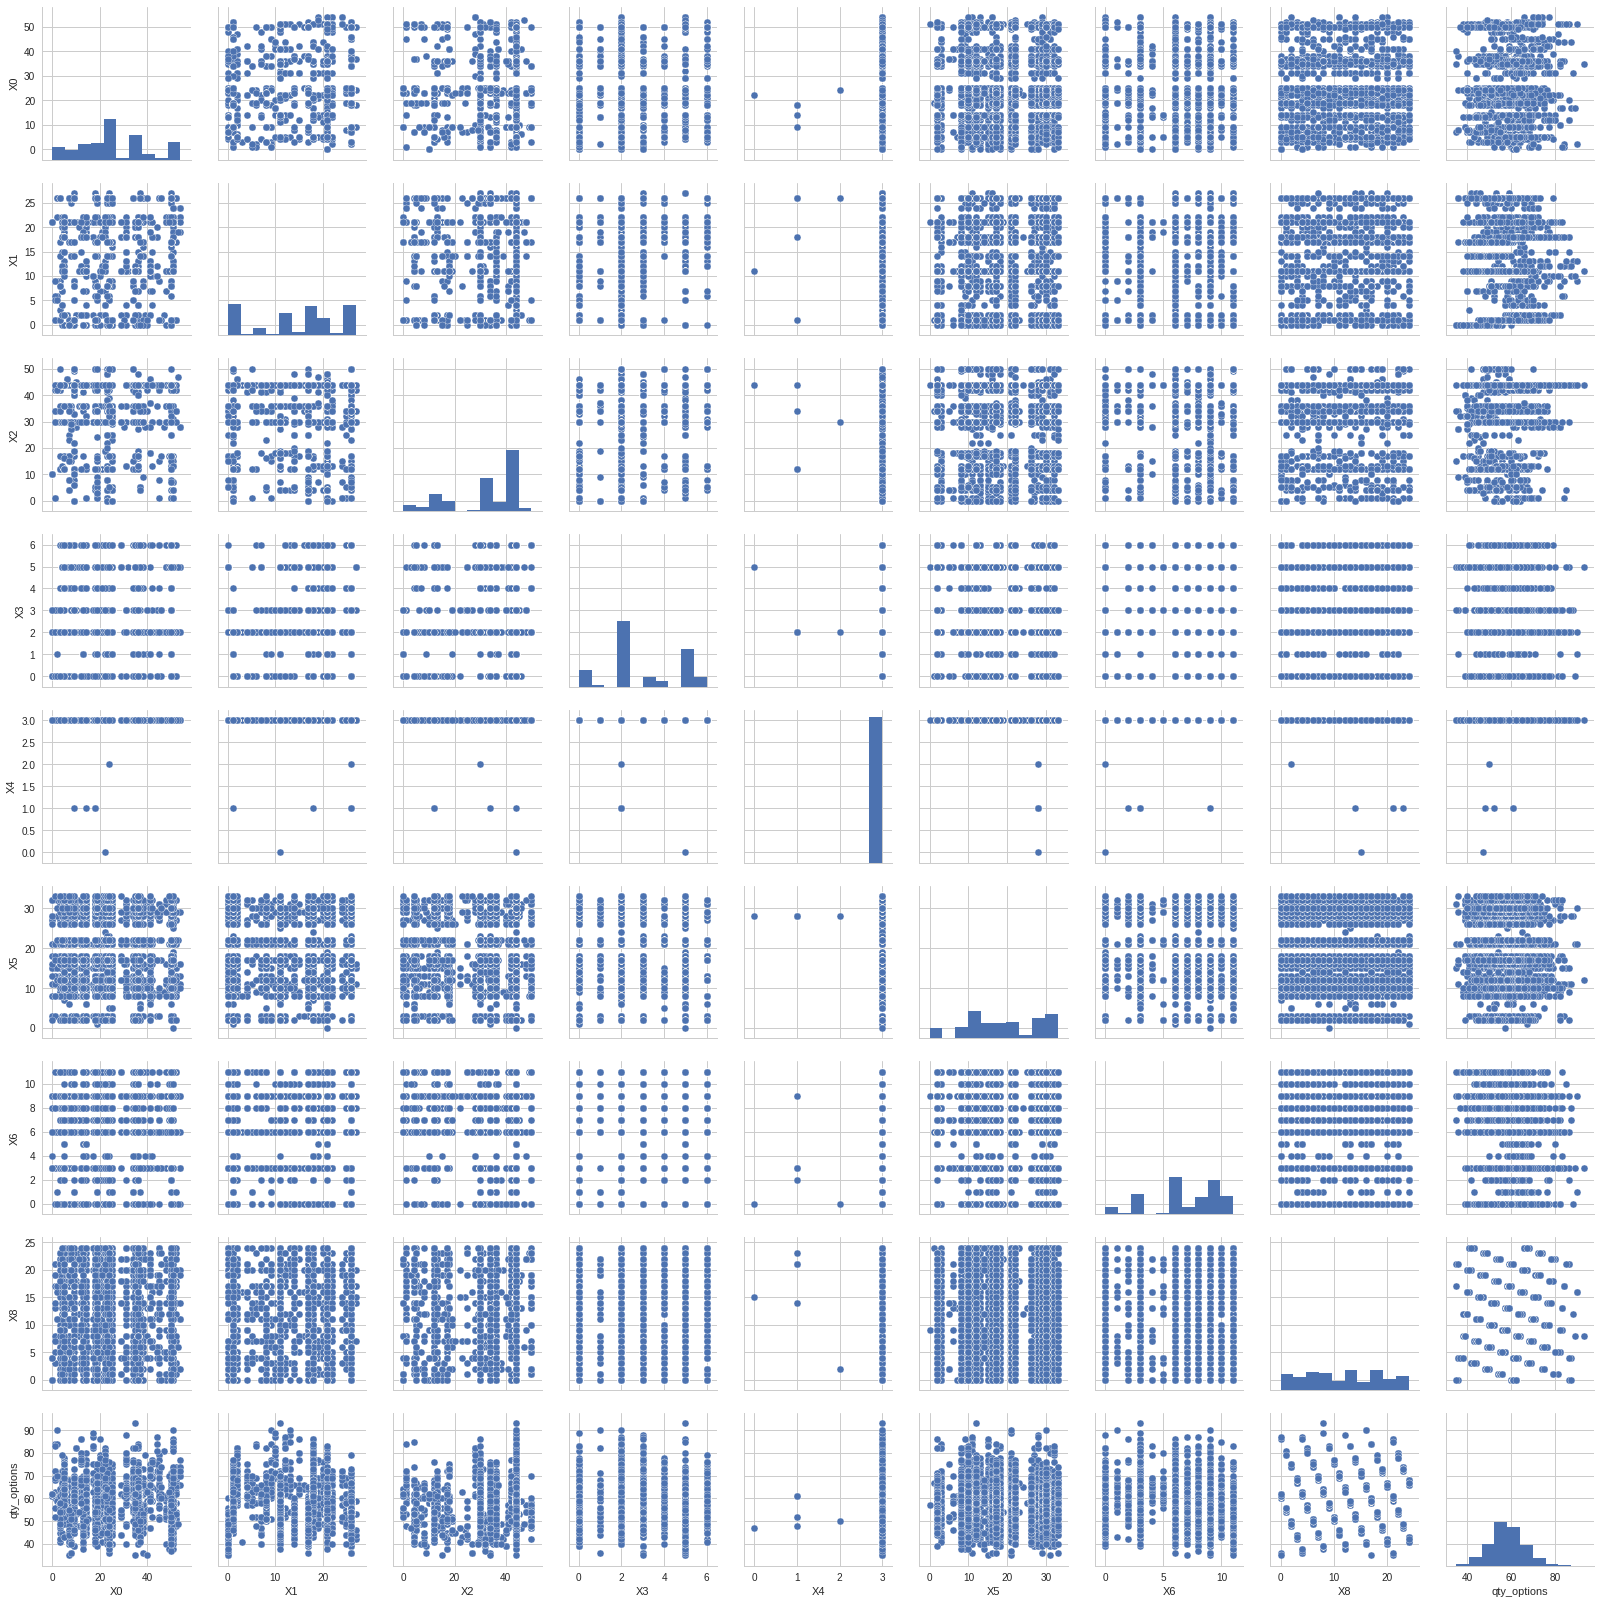

In [20]:
li_columnNames2 = [e for e in list(df_test.columns.values) if e in {'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
df_display = df_test[li_columnNames2].copy()
df_display['qty_options'] = df_test[li_columnNames].sum(axis=1)
df_display.head(5)
list_temp = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
list_value = list(string.lowercase) + list('a' + x for x in list(string.lowercase)) + ['ba', 'bb', 'bc']
i = 0
value_to_int = {}
for j in list_value:
    value_to_int[j] = i
    i += 1
df_display = df_display.replace(value_to_int)
sns.set()
sns.set_style('whitegrid')
sns.pairplot(df_display)
plt.show()

It looks pretty similar.
## Correlation matrix:

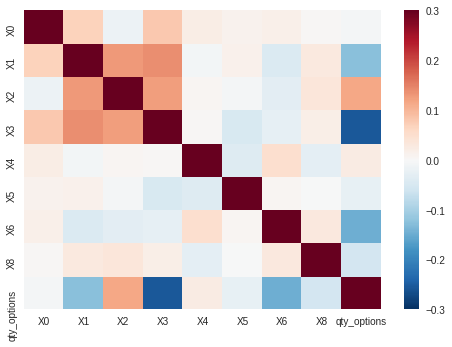

In [21]:
corr = df_display.corr()
sns.heatmap(df_display.corr(), vmax=.3)
plt.show()

also very similar. So onto more crafty data wrangling.

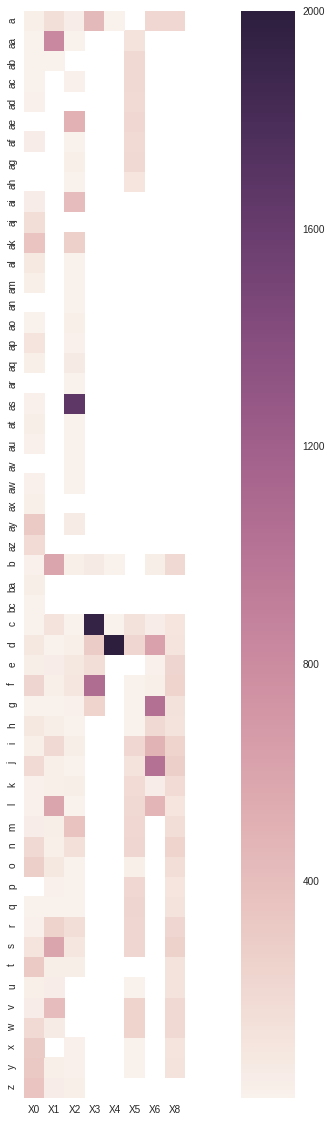

In [22]:
list_temp = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
fig, ax = plt.subplots(figsize=(20, 20))
sns.set_style('whitegrid')
sns.heatmap(df_train[list_temp].apply(pd.Series.value_counts), vmax = 2000, square = True)
plt.show()

In [15]:
def reconstruct_df(df, list_normal, list_log, list_no_touch, list_sum_display):
    for i in list_log:
        list_value = df[i].value_counts().index.tolist()
        value_to_int = {}
        k = 0
        for j in list_value:
            value_to_int[j] = k
            k += 1
        df[i] = df[i].replace(value_to_int)
    for i in list_normal:
        list_value = df[i].value_counts().index.tolist()
        value_to_int = {}
        k = 0
        for j in range(len(list_value), 0, -2):
            value_to_int[list_value[j-1]] = k
            k += 1
            del list_value[j-1]
        for j in range(len(list_value)):
            value_to_int[list_value[j]] = k
            k += 1
        df[i] = df[i].replace(value_to_int)
    for i in list_no_touch:
        list_value = list(string.lowercase) + list('a' + x for x in list(string.lowercase)) + ['ba', 'bb', 'bc']
        k = 0
        value_to_int = {}
        for j in list_value:
            value_to_int[j] = k
            k += 1
        df[i] = df[i].replace(value_to_int)
    df['qty_options'] = df[list_sum_display].sum(axis=1)
    return df

In [16]:
list_norm = ['X0', 'X1', 'X5', 'X6']
list_log = ['X2', 'X3', 'X4']
list_no_touch = ['X8']
list_the_rest = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
df_train_eng = reconstruct_df(df_train.copy(), list_norm, list_log, list_no_touch, list_the_rest)
df_test_eng = reconstruct_df(df_test.copy(), list_norm, list_log, list_no_touch, list_the_rest)

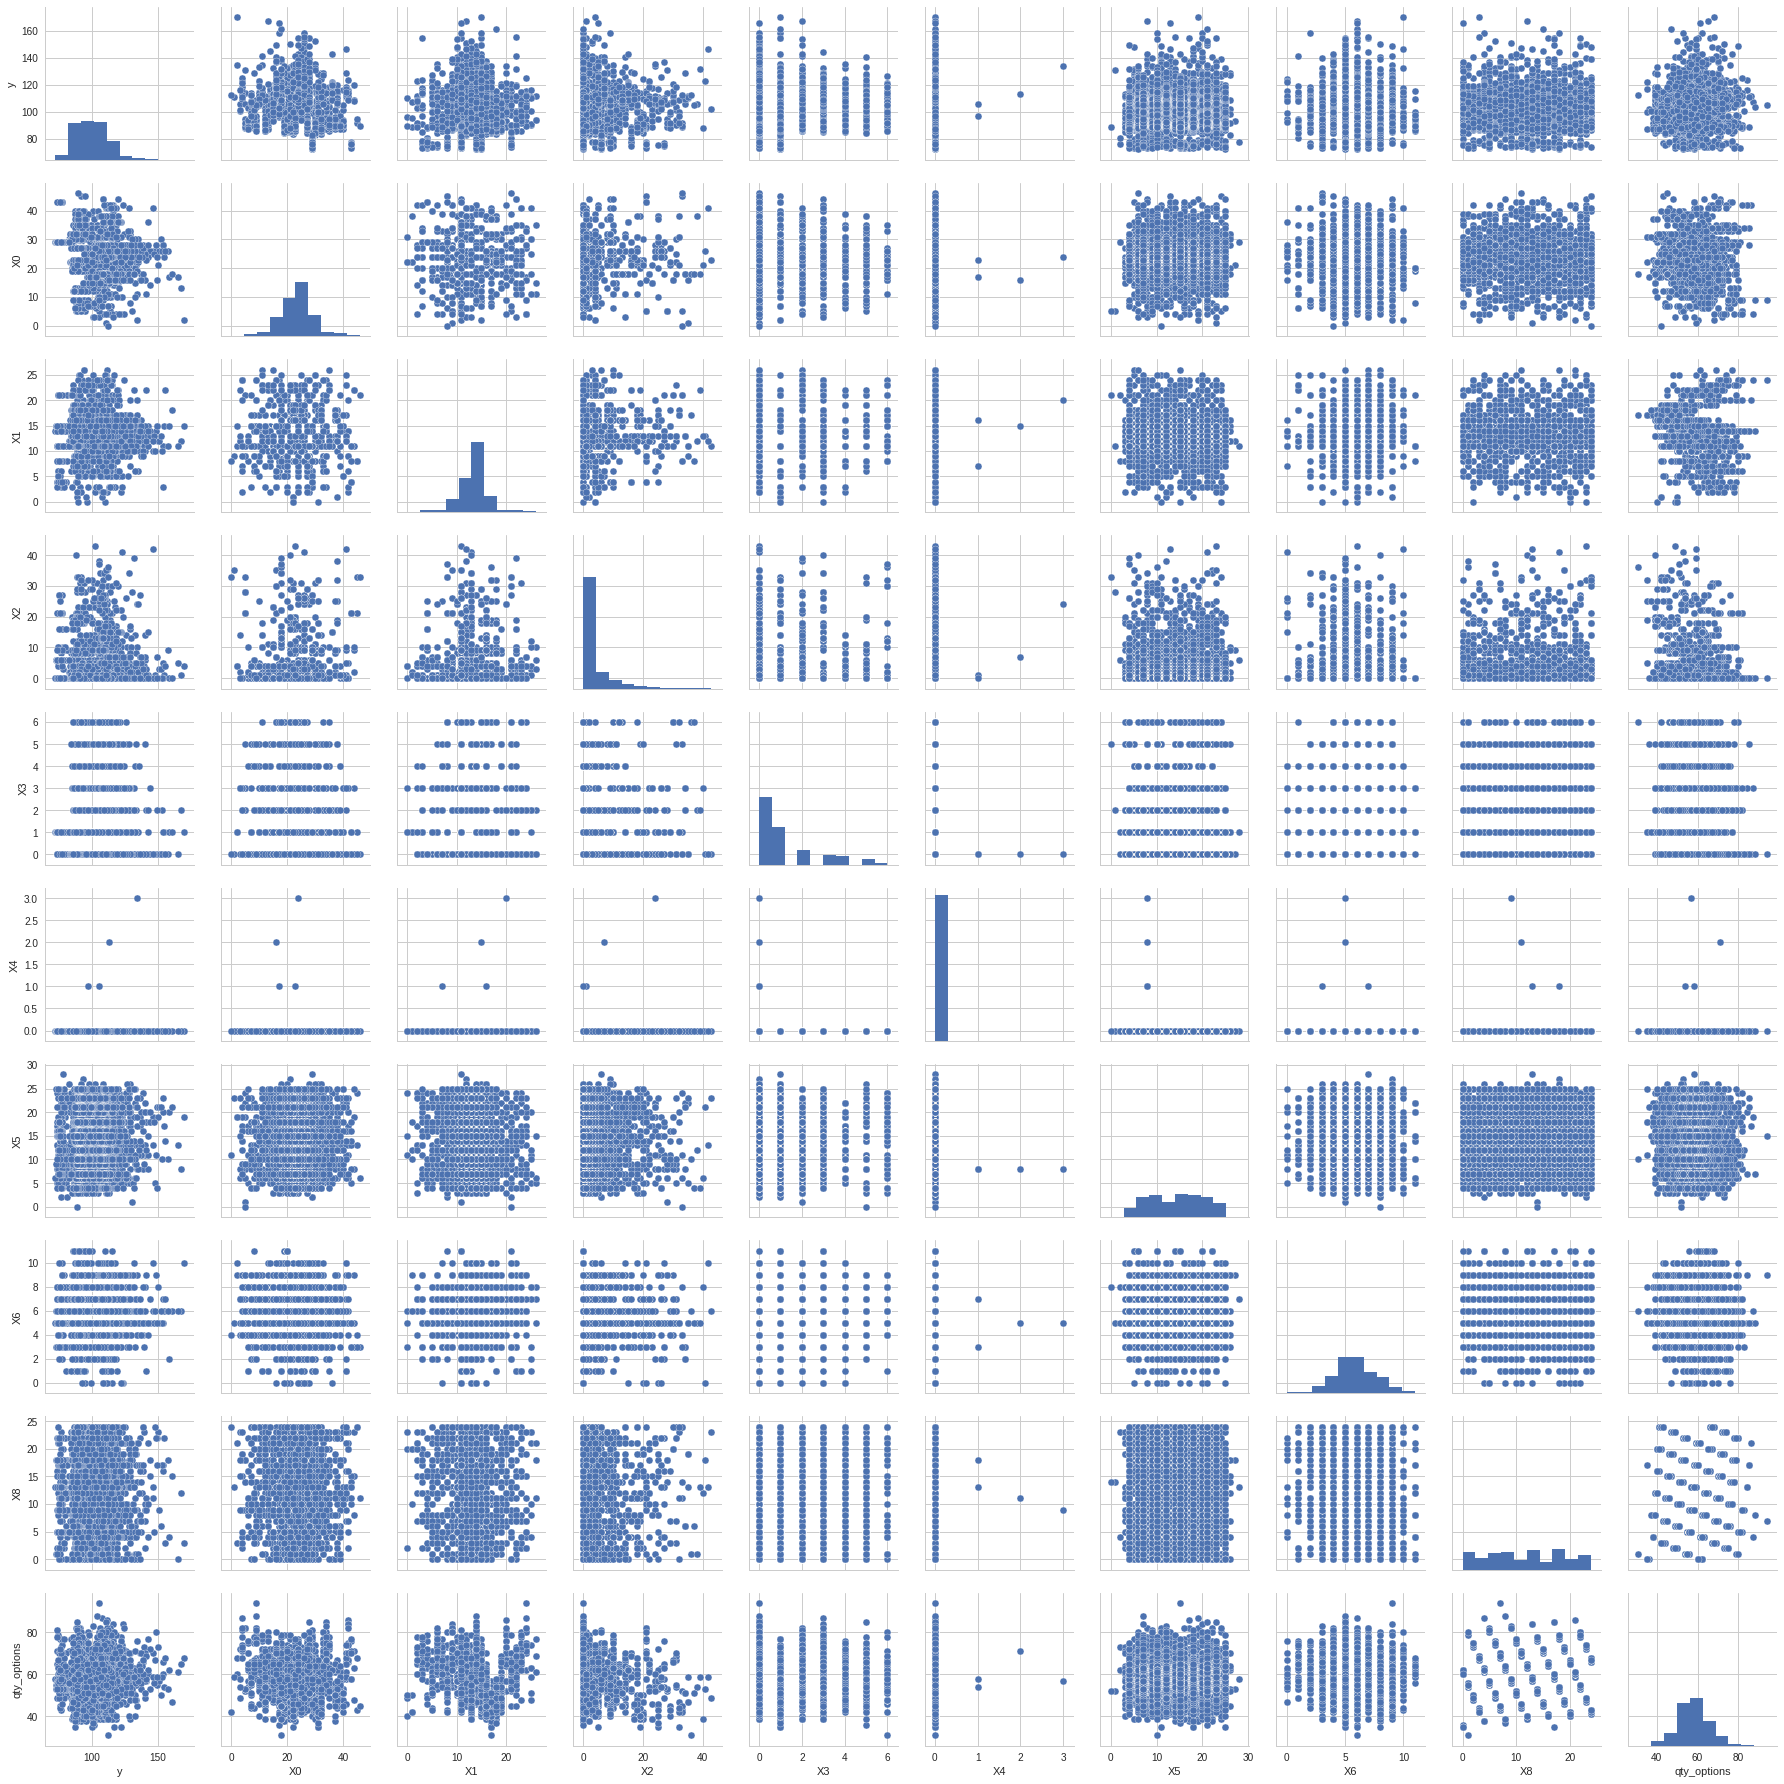

In [25]:
li_columnNames = ['y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
sns.set()
sns.set_style('whitegrid')
sns.pairplot(df_train_eng[li_columnNames])
plt.show()

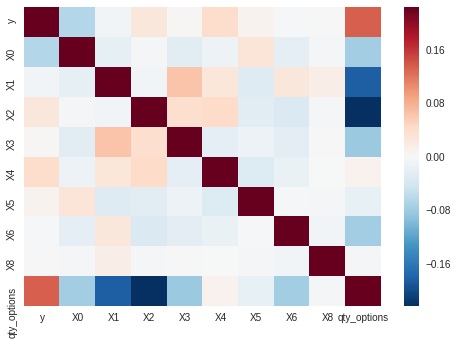

In [26]:
corr = df_train_eng[li_columnNames].corr()
sns.heatmap(corr, vmax=.2)
plt.show()

OK, now that is interesting, as the correlation matrix changed significantly. Mainly towards bringing out more pronounced negative realtionships.

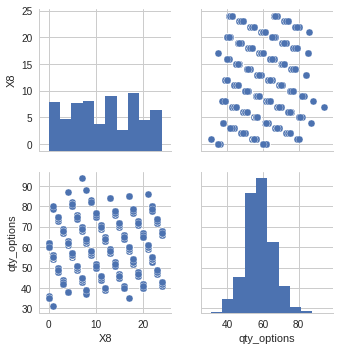

In [229]:
sns.pairplot(df_train_eng, vars=['X8', 'qty_options'])
plt.show()

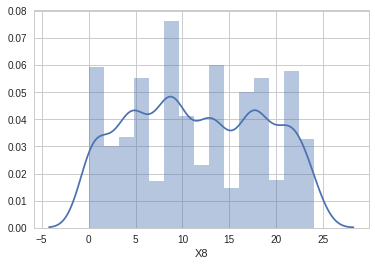

In [230]:
sns.distplot(df_train_eng['X8'])
plt.show()

### Next, let's have a look at the correlation of all the binary options:

In [27]:
%matplotlib
%matplotlib notebook

Using matplotlib backend: Qt5Agg


In [28]:
list_high_Xs = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options'}]
corr = df_train_eng[list_high_Xs].corr().fillna(0)
np.fill_diagonal(corr.values, 0)
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.heatmap(corr, vmax=.8)
plt.show()

In [29]:
%matplotlib
%matplotlib inline

Using matplotlib backend: Qt5Agg


On first look, it appears that there are a number of either very strong negative or positive correlations and a lot of ligthly correlated data. Let's see:

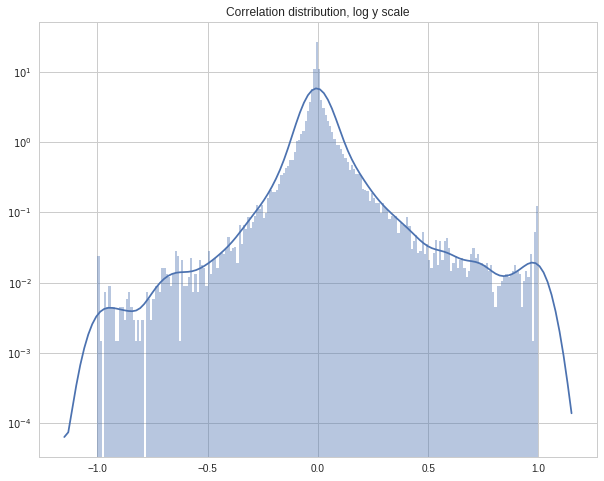

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.distplot(corr.unstack(), bins = 200, kde_kws={"bw": .05, })
plt.title('Correlation distribution, log y scale')
plt.yscale('log')
plt.show()

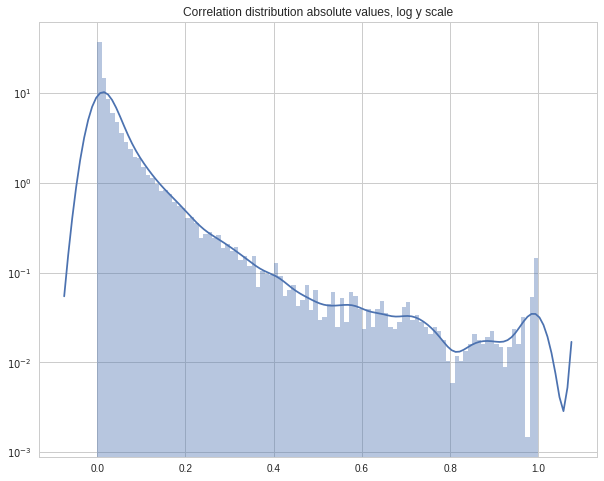

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.distplot(corr.abs().unstack(), bins = 100, kde_kws={"bw": .025, })
plt.title('Correlation distribution absolute values, log y scale')
plt.yscale('log')
plt.show()

These graphs show that most have no or very little correlation. But: interestingly the quantity increases once the correlation factor reaches approx. 0.8 (both, neg and pos). Might be worth digging a bit into this.

In [32]:
df_corr = pd.DataFrame(corr.abs().unstack().sort_values(ascending = False))
df_corr_srt = df_corr[df_corr[0] >= 0.8].copy()
df_corr_srt.sort_index().head(20)

0
X101 X179  0.842304
     X304  0.828282
     X348  0.899510
     X80   0.901647
     X98   0.941520
X102 X214  1.000000
     X239  1.000000
     X308  0.850348
     X370  0.982490
     X53   1.000000
X108 X371  0.983502
X111 X113  0.940322
     X134  0.940322
     X147  0.940322
     X198  0.925241
     X222  0.940322
     X48   0.940322
     X66   0.963333
X112 X183  0.839667
     X199  1.000000

In [33]:
list_index = list(set(df_corr_srt.index.get_level_values(0).unique().append(df_corr_srt.index.get_level_values(1).unique()).values))

In [34]:
%matplotlib
%matplotlib notebook

Using matplotlib backend: Qt5Agg


In [35]:
list_test = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
list_train = ['y'] + list_test
list_train = list_train + list_index
list_test = list_test + list_index
corr = df_train_eng[list_train].corr().fillna(0)
np.fill_diagonal(corr.values, 0)
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.heatmap(corr, vmax=.5)
plt.show()


In [36]:
%matplotlib
%matplotlib inline

Using matplotlib backend: Qt5Agg


# So far so good. Let's it a model

In [18]:
list_test = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
list_train = ['y'] + list_test
df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]

In [19]:
df_y = df_X['y']

In [20]:
df_X = df_X.drop('y', axis=1)
df_X.head(5)

X0  X1  X2  X3  X4  X5  X6  X8  qty_options
0   5  11  28   2   0   1   5  14           52
1   5  21  33   5   0   0   8  14           52
2  29   8   6   0   0   2   5  23           73
3  29  21   6   1   0   2   8   4           62
4  29  11   6   1   0  28   7  13           58

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=997)
df_Kaggle.head(5)

X0  X1  X2  X3  X4  X5  X6  X8  qty_options  X238  ...   X358  X129  X128  \
ID                                                     ...                      
1   18  11   6   1   0   1   9  22           54     0  ...      1     0     1   
2   27  15   2   2   0  30   6  24           67     1  ...      0     1     1   
3   18  11   0   1   0  31   5   9           57     0  ...      0     0     1   
4   18  12   6   1   0   2   8  13           58     0  ...      1     0     1   
5   20  14   0   0   0   0   4  12           65     1  ...      1     0     1   

    X127  X126  X125  X357  X89  X356  X120  
ID                                           
1      0     0     0     0    0     0     0  
2      1     0     0     0    0     1     1  
3      0     0     0     0    0     0     1  
4      0     0     0     0    0     0     1  
5      0     0     0     0    0     0     1  

[5 rows x 191 columns]

In [41]:
linearRegress = LinearRegression()

In [42]:
linearRegress.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
y_pred = pd.Series(linearRegress.predict(X_test), index=X_test.index)
y_Kaggle = pd.Series(linearRegress.predict(df_Kaggle), name='y', index=df_Kaggle.index)
r2_score(y_test, y_pred)

0.57637435108697443

In [44]:
type(y_Kaggle)

pandas.core.series.Series

In [45]:
y_Kaggle.to_csv(path='../data/201706062122.csv', index_label='ID', header = True) #0.52106

In [46]:
df_test.tail(5)

X0  X1  X2 X3 X4  X5 X6 X8  X10  X11  ...   X375  X376  X377  X378  \
ID                                          ...                            
8410  aj   h  as  f  d  aa  j  e    0    0  ...      0     0     0     0   
8411   t  aa  ai  d  d  aa  j  y    0    0  ...      0     1     0     0   
8413   y   v  as  f  d  aa  d  w    0    0  ...      0     0     0     0   
8414  ak   v  as  a  d  aa  c  q    0    0  ...      0     0     1     0   
8416   t  aa  ai  c  d  aa  g  r    0    0  ...      1     0     0     0   

      X379  X380  X382  X383  X384  X385  
ID                                        
8410     0     0     0     0     0     0  
8411     0     0     0     0     0     0  
8413     0     0     0     0     0     0  
8414     0     0     0     0     0     0  
8416     0     0     0     0     0     0  

[5 rows x 376 columns]

In [47]:
clf = svm.SVR()
clf.fit(X_train, y_train)
r2_score(y_test, y_pred)

0.57637435108697443

In [48]:
y_pred = pd.Series(clf.predict(X_test), index=X_test.index)
y_Kaggle = pd.Series(clf.predict(df_Kaggle), name='y', index=df_Kaggle.index)

In [49]:
y_Kaggle.to_csv(path='../data/201706062147.csv', index_label='ID', header = True) #0.24227

In [50]:
model = Ridge(alpha = 1.6, max_iter = 1000, normalize = False, fit_intercept = False, tol = 0.001)
model.fit(X_train, y_train)

Ridge(alpha=1.6, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_Kaggle = pd.Series(model.predict(df_Kaggle), name='y', index=df_Kaggle.index)
r2_score(y_test, y_pred)

0.56571911774993522

In [52]:
y_Kaggle.to_csv(path='../data/201706062200.csv', index_label='ID', header = True) # 0.52775

In [53]:
model = RandomForestRegressor(n_estimators = 300)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [54]:
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_Kaggle = pd.Series(model.predict(df_Kaggle), name='y', index=df_Kaggle.index)
r2_score(y_test, y_pred)

0.54826418944859023

In [55]:
def doPCA(df, num_comp, solver='randomized'):
    model = PCA(n_components = num_comp, svd_solver=solver, random_state=7, whiten=True)
    model.fit(df)
    return model

In [56]:
model = doPCA(X_train, 111, 'full')
X_train_trans = model.transform(X_train)
X_test_trans = model.transform(X_test)
X_Kaggle = model.transform(df_Kaggle)

In [57]:
model = LinearRegression()
model.fit(X_train_trans, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
r2_score(y_test, y_pred)

0.5796740866112251

In [ ]:
y_Kaggle.to_csv(path='../data/201706070840.csv', index_label='ID', header = True)

In [92]:
model = doPCA(X_train, 40, 'full')
X_train_trans = model.transform(X_train)
X_test_trans = model.transform(X_test)
X_Kaggle = model.transform(df_Kaggle)

In [93]:
model = Ridge(alpha = 2.5, max_iter = 2000, normalize = False, fit_intercept = False, tol = 0.001)
model.fit(X_train_trans, y_train)

Ridge(alpha=2.5, copy_X=True, fit_intercept=False, max_iter=2000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [94]:
y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
r2_score(y_test, y_pred)

-61.591972475574444

In [95]:
y_pred.head(15)

2718    -3.715295
2326    -3.754032
3753    -5.000295
855     10.105921
3762     8.587713
711     -8.650018
2812     4.575638
775     -4.643069
1434    -7.671252
303    -10.539839
2868     5.386822
3615     5.843697
446    -10.067400
1619    -4.916033
313     -7.611744
dtype: float64

In [98]:
y_test.head(15)

2718     99.84
2326     87.49
3753     89.05
855     111.10
3762    107.34
711     100.77
2812     98.90
775     105.35
1434     89.55
303      90.39
2868     97.26
3615     98.16
446      89.66
1619    103.70
313      89.41
Name: y, dtype: float64

In [62]:
model = doPCA(X_train, 80, 'full')
X_train_trans = model.transform(X_train)
X_test_trans = model.transform(X_test)
X_Kaggle = model.transform(df_Kaggle)
model = svm.SVR()
model.fit(X_train_trans, y_train)
y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
r2_score(y_test, y_pred)

0.38944360659277699

In [63]:
model = doPCA(X_train, 100, 'full')
X_train_trans = model.transform(X_train)
X_test_trans = model.transform(X_test)
X_Kaggle = model.transform(df_Kaggle)
model = RandomForestRegressor(n_estimators = 800)
print model
model.fit(X_train_trans, y_train)
y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
r2_score(y_test, y_pred)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=800, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


0.47518951296042078

In [64]:
model = doPCA(X_train, 120, 'full')
X_train_trans = model.transform(X_train)
X_test_trans = model.transform(X_test)
X_Kaggle = model.transform(df_Kaggle)
model = MLPRegressor(solver='sgd', learning_rate='adaptive', random_state=999, batch_size = 500, max_iter=1000, hidden_layer_sizes=(1500,))
print model
model.fit(X_train_trans, y_train)
y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
r2_score(y_test, y_pred)

MLPRegressor(activation='relu', alpha=0.0001, batch_size=500, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1500,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=999,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


-2.0152068351640057e+25

In [68]:
best_r2 = -1E+80
best_values = {}
print 'starting...'
for pca_value in (17, 20, 23, 26):
#    print pca_value
    model = doPCA(X_train, pca_value, 'full')
    X_train_trans = model.transform(X_train)
    X_test_trans = model.transform(X_test)
#    X_Kaggle = model.transform(df_Kaggle)
    for hl_value in ((40,), (50,), (60,), (70,), (110,), (120,), (130,), (210,), (230,), (250,), (270,), (30, 30), (40, 40), (50, 50), (60, 60)):
#        print hl_value
        model = MLPRegressor(solver='sgd', learning_rate='adaptive', random_state=999, batch_size = 500, max_iter=1000, hidden_layer_sizes=hl_value)
        model.fit(X_train_trans, y_train)
#        print model
        y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
        current_r2 = r2_score(y_test, y_pred)
        print 'Current R^2: ', current_r2, ' with values: PCA: ', pca_value, ', hidden Layer(s): ', hl_value
        if current_r2 > best_r2:
            best_r2 = current_r2
            best_values['r2'] = current_r2
            best_values['pca_value'] = pca_value
            best_values['hl_value'] = hl_value


starting...
Current R^2:  0.526237619489  with values: PCA:  17 , hidden Layer(s):  (40,)
Current R^2:  0.528209818412  with values: PCA:  17 , hidden Layer(s):  (50,)
Current R^2:  0.524671155459  with values: PCA:  17 , hidden Layer(s):  (60,)
Current R^2:  0.526238988032  with values: PCA:  17 , hidden Layer(s):  (70,)
Current R^2:  0.531745432284  with values: PCA:  17 , hidden Layer(s):  (110,)
Current R^2:  0.529995518076  with values: PCA:  17 , hidden Layer(s):  (120,)
Current R^2:  0.522449220037  with values: PCA:  17 , hidden Layer(s):  (130,)
Current R^2:  0.528660658094  with values: PCA:  17 , hidden Layer(s):  (210,)
Current R^2:  0.526145912448  with values: PCA:  17 , hidden Layer(s):  (230,)
Current R^2:  0.526899446646  with values: PCA:  17 , hidden Layer(s):  (250,)
Current R^2:  0.525061708933  with values: PCA:  17 , hidden Layer(s):  (270,)
Current R^2:  0.513238265798  with values: PCA:  17 , hidden Layer(s):  (30, 30)
Current R^2:  0.525661789863  with values:

In [72]:
best_r2 = -1E+80
best_values = {}
print 'starting...'
for pca_value in (100, 110, 120):
    model = doPCA(X_train, pca_value, 'full')
    X_train_trans = model.transform(X_train)
    X_test_trans = model.transform(X_test)
    X_Kaggle = model.transform(df_Kaggle)
    model = LinearRegression()
    model.fit(X_train_trans, y_train)
    y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
    y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
    current_r2 = r2_score(y_test, y_pred)
    print 'Current R^2: ', current_r2, ' with values: PCA: ', pca_value
    if current_r2 > best_r2:
        best_r2 = current_r2
        best_values['r2'] = current_r2
        best_values['pca_value'] = pca_value
print 'Best R^2 score: ', best_r2, ' with values: PCA: ', best_values['pca_value']
y_Kaggle.to_csv(path='../data/201706071912.csv', index_label='ID', header = True)

starting...


TypeError: 'int' object is not iterable

In [73]:
model = doPCA(X_train, pca_value, 'full')
X_train_trans = model.transform(X_train)
X_test_trans = model.transform(X_test)
X_Kaggle = model.transform(df_Kaggle)
model = LinearRegression()
model.fit(X_train_trans, y_train)
y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
y_Kaggle.to_csv(path='../data/201706071912.csv', index_label='ID', header = True)

In [99]:
df_X = df_train_eng
df_Kaggle = df_test_eng
df_y = df_X['y']
df_X = df_X.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=997)
model = doPCA(X_train, pca_value, 'full')
X_train_trans = model.transform(X_train)
X_test_trans = model.transform(X_test)
X_Kaggle = model.transform(df_Kaggle)
model = LinearRegression()
model.fit(X_train_trans, y_train)
y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
print r2_score(y_test, y_pred)
y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
y_Kaggle.to_csv(path='../data/201706072000.csv', index_label='ID', header = True)

0.572481255795


# New Best

In [101]:
list_index = list(set(df_corr_srt.index.get_level_values(0).unique().values))
list_test = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
list_train = ['y'] + list_test
list_train = list_train + list_index
list_test = list_test + list_index


182


In [102]:
df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y']
df_X = df_X.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=997)
model = doPCA(X_train, pca_value, 'full')
X_train_trans = model.transform(X_train)
X_test_trans = model.transform(X_test)
X_Kaggle = model.transform(df_Kaggle)
model = LinearRegression()
model.fit(X_train_trans, y_train)
y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
print r2_score(y_test, y_pred)
y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
y_Kaggle.to_csv(path='../data/201706072006.csv', index_label='ID', header = True)

0.576995531205


In [103]:
li_columnNames = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
list_index = [e for e in li_columnNames if e not in list(set(df_corr_srt.index.get_level_values(0).unique().values))]
list_test = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
list_train = ['y'] + list_test
list_train = list_train + list_index
list_test = list_test + list_index

In [104]:
df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y']
df_X = df_X.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=997)
model = doPCA(X_train, pca_value, 'full')
X_train_trans = model.transform(X_train)
X_test_trans = model.transform(X_test)
X_Kaggle = model.transform(df_Kaggle)
model = LinearRegression()
model.fit(X_train_trans, y_train)
y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
print r2_score(y_test, y_pred)
y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
y_Kaggle.to_csv(path='../data/201706072012.csv', index_label='ID', header = True)

0.537645292741


In [105]:
#li_columnNames = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
#list_index = [e for e in li_columnNames if e not in list(set(df_corr_srt.index.get_level_values(0).unique().values))]
list_test = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
list_train = ['y'] + list_test
#list_train = list_train + list_index
#list_test = list_test + list_index

In [107]:
best_r2 = -1E+80
best_values = {}
df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y']
df_X = df_X.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=997)
print 'starting...'
for pca_value in (1, 2, 3, 4, 5, 6, 7, 8, 9):
    model = doPCA(X_train, pca_value, 'full')
    X_train_trans = model.transform(X_train)
    X_test_trans = model.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_trans, y_train)
    y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
    current_r2 = r2_score(y_test, y_pred)
    print 'Current R^2: ', current_r2, ' with values: PCA: ', pca_value
    if current_r2 > best_r2:
        best_r2 = current_r2
        best_values['r2'] = current_r2
        best_values['pca_value'] = pca_value
print 'Best R^2 score: ', best_r2, ' with values: PCA: ', best_values['pca_value']
model = doPCA(X_train, best_values['pca_value'], 'full')
X_train_trans = model.transform(X_train)
X_Kaggle = model.transform(df_Kaggle)
model = LinearRegression()
model.fit(X_train_trans, y_train)

y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
y_Kaggle.to_csv(path='../data/201706072018.csv', index_label='ID', header = True)

starting...
Current R^2:  0.0189905911566  with values: PCA:  1
Current R^2:  0.0186884684334  with values: PCA:  2
Current R^2:  0.0199835490405  with values: PCA:  3
Current R^2:  0.0222977919235  with values: PCA:  4
Current R^2:  0.0182991718825  with values: PCA:  5
Current R^2:  0.0191505743625  with values: PCA:  6
Current R^2:  0.0191146552751  with values: PCA:  7
Current R^2:  0.0184129265553  with values: PCA:  8
Current R^2:  0.0208740171303  with values: PCA:  9
Best R^2 score:  0.0222977919235  with values: PCA:  4


In [109]:
li_columnNames = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
list_index = li_columnNames
#list_index = [e for e in li_columnNames if e not in list(set(df_corr_srt.index.get_level_values(0).unique().values))]
#list_test = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
list_test = []
list_train = ['y']
list_train = list_train + list_index
list_test = list_test + list_index
best_r2 = -1E+80
best_values = {}
df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y']
df_X = df_X.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=997)
print 'starting...'
for pca_value in (50, 100, 150, 200, 250, 300, 350):
    model = doPCA(X_train, pca_value, 'full')
    X_train_trans = model.transform(X_train)
    X_test_trans = model.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_trans, y_train)
    y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
    current_r2 = r2_score(y_test, y_pred)
    print 'Current R^2: ', current_r2, ' with values: PCA: ', pca_value
    if current_r2 > best_r2:
        best_r2 = current_r2
        best_values['r2'] = current_r2
        best_values['pca_value'] = pca_value
print 'Best R^2 score: ', best_r2, ' with values: PCA: ', best_values['pca_value']
model = doPCA(X_train, best_values['pca_value'], 'full')
X_train_trans = model.transform(X_train)
X_Kaggle = model.transform(df_Kaggle)
model = LinearRegression()
model.fit(X_train_trans, y_train)

y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
y_Kaggle.to_csv(path='../data/201706072018.csv', index_label='ID', header = True)

starting...
Current R^2:  0.559362113842  with values: PCA:  50
Current R^2:  0.571853908092  with values: PCA:  100
Current R^2:  0.574021415338  with values: PCA:  150
Current R^2:  0.568965974737  with values: PCA:  200
Current R^2:  -5.97152929827e+25  with values: PCA:  250
Current R^2:  -9.51294951476e+26  with values: PCA:  300
Current R^2:  -1.18133580182e+28  with values: PCA:  350
Best R^2 score:  0.574021415338  with values: PCA:  150


In [114]:
li_columnNames = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
list_index = li_columnNames
#list_index = [e for e in li_columnNames if e not in list(set(df_corr_srt.index.get_level_values(0).unique().values))]
#list_test = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
list_test = ['X2', 'X3', 'qty_options']
list_train = ['y'] + list_test
list_train = list_train + list_index
list_test = list_test + list_index
best_r2 = -1E+80
best_values = {}
df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y']
df_X = df_X.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=997)
print 'starting...'
for pca_value in (136,137,138,139,140,141,142,143,144):
    model = doPCA(X_train, pca_value, 'full')
    X_train_trans = model.transform(X_train)
    X_test_trans = model.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_trans, y_train)
    y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
    current_r2 = r2_score(y_test, y_pred)
    print 'Current R^2: ', current_r2, ' with values: PCA: ', pca_value
    if current_r2 > best_r2:
        best_r2 = current_r2
        best_values['r2'] = current_r2
        best_values['pca_value'] = pca_value
print 'Best R^2 score: ', best_r2, ' with values: PCA: ', best_values['pca_value']
model = doPCA(X_train, best_values['pca_value'], 'full')
X_train_trans = model.transform(X_train)
X_Kaggle = model.transform(df_Kaggle)
model = LinearRegression()
model.fit(X_train_trans, y_train)

y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
y_Kaggle.to_csv(path='../data/201706072025.csv', index_label='ID', header = True)

starting...
Current R^2:  0.572139616327  with values: PCA:  136
Current R^2:  0.573266380035  with values: PCA:  137
Current R^2:  0.574247245691  with values: PCA:  138
Current R^2:  0.575270761403  with values: PCA:  139
Current R^2:  0.575547534583  with values: PCA:  140
Current R^2:  0.575080072968  with values: PCA:  141
Current R^2:  0.575271744363  with values: PCA:  142
Current R^2:  0.574005881854  with values: PCA:  143
Current R^2:  0.573550639533  with values: PCA:  144
Best R^2 score:  0.575547534583  with values: PCA:  140


# New best

In [126]:
all_data = pd.concat((df_train, df_test))

# remove duplicated columns
#print('\n Number of columns before cleaning: %d' % len(all_data.columns))
c = all_data.columns
remove = []
for i in range(len(c)-1):
    v = all_data[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,all_data[c[j]].values):
            remove.append(c[j])
#            print(' Column %s is identical to %s. Removing %s' % (str(c[i]), str(c[j]), str(c[j])))
li_complimentary = ['X29', 'X52', 'X54', 'X76', 'X128', 'X142', 'X186', 'X204', 'X232', 'X263', 'X156']
li_duplicate = remove

li_columnNames = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
list_index = [e for e in li_columnNames if e not in li_complimentary + li_duplicate]
#list_index = [e for e in li_index if e not in list(set(df_corr_srt.index.get_level_values(0).unique().values))]
list_test = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
#list_test = ['X2', 'X3', 'qty_options']
list_train = ['y'] + list_test
list_train = list_train + list_index
list_test = list_test + list_index
best_r2 = -1E+80
best_values = {}
df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y']
df_X = df_X.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=997)
print 'starting...'
for pca_value in (156,157,158,159,160):
    model = doPCA(X_train, pca_value, 'full')
    X_train_trans = model.transform(X_train)
    X_test_trans = model.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_trans, y_train)
    y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
    current_r2 = r2_score(y_test, y_pred)
    print 'Current R^2: ', current_r2, ' with values: PCA: ', pca_value
    if current_r2 > best_r2:
        best_r2 = current_r2
        best_values['r2'] = current_r2
        best_values['pca_value'] = pca_value
print 'Best R^2 score: ', best_r2, ' with values: PCA: ', best_values['pca_value']
model = doPCA(X_train, best_values['pca_value'], 'full')
X_train_trans = model.transform(X_train)
X_Kaggle = model.transform(df_Kaggle)
model = LinearRegression()
model.fit(X_train_trans, y_train)

y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
y_Kaggle.to_csv(path='../data/201706072045.csv', index_label='ID', header = True)

starting...
Current R^2:  0.573208229849  with values: PCA:  156
Current R^2:  0.573453446371  with values: PCA:  157
Current R^2:  0.574587785346  with values: PCA:  158
Current R^2:  0.574574493092  with values: PCA:  159
Current R^2:  0.573906342716  with values: PCA:  160
Best R^2 score:  0.574587785346  with values: PCA:  158


In [133]:
all_data = pd.concat((df_train, df_test))

# remove duplicated columns
#print('\n Number of columns before cleaning: %d' % len(all_data.columns))
c = all_data.columns
remove = []
for i in range(len(c)-1):
    v = all_data[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,all_data[c[j]].values):
            remove.append(c[j])
#            print(' Column %s is identical to %s. Removing %s' % (str(c[i]), str(c[j]), str(c[j])))
li_complimentary = ['X29', 'X52', 'X54', 'X76', 'X128', 'X142', 'X186', 'X204', 'X232', 'X263', 'X156']
li_duplicate = remove

li_columnNames = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
list_index = [e for e in li_columnNames if e not in li_complimentary + li_duplicate]
list_index = [e for e in list_index if e not in list(set(df_corr_srt.index.get_level_values(0).unique().values))]
list_test = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
#list_test = ['X2', 'X3', 'qty_options']
list_train = ['y'] + list_test
list_train = list_train + list_index
list_test = list_test + list_index
best_r2 = -1E+80
best_values = {}
df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y']
df_X = df_X.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=997)
print 'starting...'
for pca_value in (120,121,122,123,124,125,126,127,128,129,130,131,132,133):
    model = doPCA(X_train, pca_value, 'full')
    X_train_trans = model.transform(X_train)
    X_test_trans = model.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_trans, y_train)
    y_pred = pd.Series(model.predict(X_test_trans), index=X_test.index)
    current_r2 = r2_score(y_test, y_pred)
    print 'Current R^2: ', current_r2, ' with values: PCA: ', pca_value
    if current_r2 > best_r2:
        best_r2 = current_r2
        best_values['r2'] = current_r2
        best_values['pca_value'] = pca_value
print 'Best R^2 score: ', best_r2, ' with values: PCA: ', best_values['pca_value']
model = doPCA(X_train, best_values['pca_value'], 'full')
X_train_trans = model.transform(X_train)
X_Kaggle = model.transform(df_Kaggle)
model = LinearRegression()
model.fit(X_train_trans, y_train)

y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
y_Kaggle.to_csv(path='../data/201706072100.csv', index_label='ID', header = True)

starting...
Current R^2:  0.53759334235  with values: PCA:  120
Current R^2:  0.537697532178  with values: PCA:  121
Current R^2:  0.537669694706  with values: PCA:  122
Current R^2:  0.537390070912  with values: PCA:  123
Current R^2:  0.534968897571  with values: PCA:  124
Current R^2:  0.534873848853  with values: PCA:  125
Current R^2:  0.537537953079  with values: PCA:  126
Current R^2:  0.535111089154  with values: PCA:  127
Current R^2:  0.533563473712  with values: PCA:  128
Current R^2:  0.535195092784  with values: PCA:  129
Current R^2:  0.537600708473  with values: PCA:  130
Current R^2:  0.537057905198  with values: PCA:  131
Current R^2:  0.537058464089  with values: PCA:  132
Current R^2:  0.537268797592  with values: PCA:  133
Best R^2 score:  0.537697532178  with values: PCA:  121


to-dos:
1. use cross-validation
2. go back to features: are there any with 0 or very low correlation. What is their distribution?
3. eliminate all features that have either all 0 or all 1 in train or test (no value using those)
4. check for identical datasets. how much vary the y?
5. try out lasso

In [168]:
all_data = pd.concat((df_train, df_test))

# remove duplicated columns
#print('\n Number of columns before cleaning: %d' % len(all_data.columns))
c = all_data.columns
remove = []
for i in range(len(c)-1):
    v = all_data[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,all_data[c[j]].values):
            remove.append(c[j])
#            print(' Column %s is identical to %s. Removing %s' % (str(c[i]), str(c[j]), str(c[j])))
li_complimentary = ['X29', 'X52', 'X54', 'X76', 'X128', 'X142', 'X186', 'X204', 'X232', 'X263', 'X156']
li_duplicate = remove

li_columnNames = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
#list_index1 = [e for e in li_columnNames if e not in li_complimentary + li_duplicate]
list_index = [e for e in list_index1 if e not in list(set(df_corr_srt.index.get_level_values(0).unique().values))]
#list_test = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
list_test = ['X2', 'X3', 'qty_options']
list_test = list_test + list_index
list_train = ['y'] + list_test
best_r2 = -1E+80
best_values = {}
df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y']
df_X = df_X.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=997)
print 'starting...'
#for pca_value in (20,50,80,110,140,170,187):
#    model = doPCA(X_train, pca_value, 'full')
#    X_train_trans = model.transform(X_train)
#    X_test_trans = model.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
current_r2 = r2_score(y_test, y_pred)
#    print 'Current R^2: ', current_r2, ' with values: PCA: ', pca_value
#    if current_r2 > best_r2:
#        best_r2 = current_r2
#        best_values['r2'] = current_r2
#        best_values['pca_value'] = pca_value
#print 'Best R^2 score: ', best_r2, ' with values: PCA: ', best_values['pca_value']
#model = doPCA(X_train, best_values['pca_value'], 'full')
#X_train_trans = model.transform(X_train)
#X_Kaggle = model.transform(df_Kaggle)
#model = LinearRegression()
#model.fit(X_train_trans, y_train)

y_Kaggle = pd.Series(model.predict(df_Kaggle), name='y', index=df_Kaggle.index)
y_Kaggle.to_csv(path='../data/201706081910.csv', index_label='ID', header = True)

starting...


In [169]:
print current_r2

0.539235130388


In [228]:
all_data = pd.concat((df_train, df_test))

# remove duplicated columns
#print('\n Number of columns before cleaning: %d' % len(all_data.columns))
c = all_data.columns
remove = []
for i in range(len(c)-1):
    v = all_data[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,all_data[c[j]].values):
            remove.append(c[j])
#            print(' Column %s is identical to %s. Removing %s' % (str(c[i]), str(c[j]), str(c[j])))
li_complimentary = ['X29', 'X52', 'X54', 'X76', 'X128', 'X142', 'X186', 'X204', 'X232', 'X263', 'X156']
li_duplicate = remove

list_index = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
list_index = [e for e in list_index if e not in li_complimentary + li_duplicate]
#list_index = [e for e in list_index if e not in list(set(df_corr_srt.index.get_level_values(0).unique().values))]
#list_test = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
list_test = ['X2', 'X3', 'X4', 'qty_options']
list_test = list_test + list_index
list_train = ['y'] + list_test
best_r2 = -1E+80
best_values = {}
df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y']
df_X = df_X.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=997)
print 'starting...'
#for pca_value in range(10, df_X.shape[1], 20):
for pca_value in range(76,86,1):
    model = doPCA(X_train, pca_value, 'full')
    X_train_trans = model.transform(X_train)
    X_test_trans = model.transform(X_test)
    model = ElasticNetCV(cv = 5)
    model.fit(X_train_trans, y=y_train)
    current_r2 = model.score(X_test_trans, y_test)
    print 'Current R^2: ', current_r2, ' with values: PCA: ', pca_value
    if current_r2 > best_r2:
        best_r2 = current_r2; best_values['r2'] = current_r2; best_values['pca_value'] = pca_value
print 'Best R^2 score: ', best_r2, ' with values: PCA: ', best_values['pca_value']
model = doPCA(X_train, best_values['pca_value'], 'full')
X_train_trans = model.transform(X_train)
X_Kaggle = model.transform(df_Kaggle)
model = ElasticNetCV(cv = 5)
model.fit(X_train_trans, y=y_train)

y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
y_Kaggle.to_csv(path='../data/201706082150.csv', index_label='ID', header = True)

starting...
Current R^2:  0.591535665807  with values: PCA:  76
Current R^2:  0.590686698533  with values: PCA:  77
Current R^2:  0.596456226606  with values: PCA:  78
Current R^2:  0.596984110113  with values: PCA:  79
Current R^2:  0.596824805326  with values: PCA:  80
Current R^2:  0.596746206492  with values: PCA:  81
Current R^2:  0.59643570486  with values: PCA:  82
Current R^2:  0.595917198981  with values: PCA:  83
Current R^2:  0.594776182389  with values: PCA:  84
Current R^2:  0.594269956273  with values: PCA:  85
Best R^2 score:  0.596984110113  with values: PCA:  79


In [236]:
all_data = pd.concat((df_train, df_test))

# remove duplicated columns
#print('\n Number of columns before cleaning: %d' % len(all_data.columns))
c = all_data.columns
remove = []
for i in range(len(c)-1):
    v = all_data[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,all_data[c[j]].values):
            remove.append(c[j])
#            print(' Column %s is identical to %s. Removing %s' % (str(c[i]), str(c[j]), str(c[j])))
li_complimentary = ['X29', 'X52', 'X54', 'X76', 'X128', 'X142', 'X186', 'X204', 'X232', 'X263', 'X156']
li_duplicate = remove

list_index = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
list_index = [e for e in list_index if e not in li_complimentary + li_duplicate]
#list_index = [e for e in list_index if e not in list(set(df_corr_srt.index.get_level_values(0).unique().values))]
#list_test = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
list_test = ['X2', 'X3', 'X4', 'X8', 'qty_options']
list_test = list_test + list_index
list_train = ['y'] + list_test
best_r2 = -1E+80
best_values = {}
df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y']
df_X = df_X.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=997)
print 'starting...'
#for pca_value in range(10, df_X.shape[1], 20):
for pca_value in range(118,125,1):
    model = doPCA(X_train, pca_value, 'full')
    X_train_trans = model.transform(X_train)
    X_test_trans = model.transform(X_test)
    model = ElasticNetCV(cv = 5)
    model.fit(X_train_trans, y=y_train)
    current_r2 = model.score(X_test_trans, y_test)
    print 'Current R^2: ', current_r2, ' with values: PCA: ', pca_value
    if current_r2 > best_r2:
        best_r2 = current_r2; best_values['r2'] = current_r2; best_values['pca_value'] = pca_value
print 'Best R^2 score: ', best_r2, ' with values: PCA: ', best_values['pca_value']
model = doPCA(X_train, best_values['pca_value'], 'full')
X_train_trans = model.transform(X_train)
X_Kaggle = model.transform(df_Kaggle)
model = ElasticNetCV(cv = 5)
model.fit(X_train_trans, y=y_train)

y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
y_Kaggle.to_csv(path='../data/201706091530.csv', index_label='ID', header = True)

starting...
Current R^2:  0.596461266397  with values: PCA:  118
Current R^2:  0.596730439626  with values: PCA:  119
Current R^2:  0.598266253868  with values: PCA:  120
Current R^2:  0.598089097867  with values: PCA:  121
Current R^2:  0.59804252299  with values: PCA:  122
Current R^2:  0.598287099093  with values: PCA:  123
Current R^2:  0.597613589688  with values: PCA:  124
Best R^2 score:  0.598287099093  with values: PCA:  123


In [281]:
all_data = pd.concat((df_train, df_test))

# remove duplicated columns
#print('\n Number of columns before cleaning: %d' % len(all_data.columns))
c = all_data.columns
remove = []
for i in range(len(c)-1):
    v = all_data[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,all_data[c[j]].values):
            remove.append(c[j])
#            print(' Column %s is identical to %s. Removing %s' % (str(c[i]), str(c[j]), str(c[j])))
li_complimentary = ['X29', 'X52', 'X54', 'X76', 'X128', 'X142', 'X186', 'X204', 'X232', 'X263', 'X156']
li_duplicate = remove

list_index = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
#list_index = [e for e in list_index if e not in li_complimentary + li_duplicate]
#list_index = [e for e in list_index if e not in list(set(df_corr_srt.index.get_level_values(0).unique().values))]
#list_test = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
list_test = ['X1', 'X2', 'X3', 'X4', 'X6', 'qty_options']
list_test = list_test + list_index
list_train = ['y'] + list_test
best_r2 = -1E+80
best_values = {}
df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y']
df_X = df_X.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=997)
print 'starting...'
#for pca_value in range(10, df_X.shape[1], 5):
for pca_value in range(67,74,1):
    model = doPCA(X_train, pca_value, 'full')
    X_train_trans = model.transform(X_train)
    X_test_trans = model.transform(X_test)
    model = ElasticNetCV(cv = 5)
    model.fit(X_train_trans, y=y_train)
    current_r2 = model.score(X_test_trans, y_test)
    #print 'Current R^2: ', current_r2, ' with values: PCA: ', pca_value
    if current_r2 > best_r2:
        best_r2 = current_r2; best_values['r2'] = current_r2; best_values['pca_value'] = pca_value
print 'Best R^2 score: ', best_r2, ' with values: PCA: ', best_values['pca_value']
model = doPCA(X_train, best_values['pca_value'], 'full')
X_train_trans = model.transform(X_train)
X_Kaggle = model.transform(df_Kaggle)
model = ElasticNetCV(cv = 5)
model.fit(X_train_trans, y=y_train)

y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
y_Kaggle.to_csv(path='../data/201706100920.csv', index_label='ID', header = True)

starting...
Best R^2 score:  0.598981680417  with values: PCA:  70


In [292]:
all_data = pd.concat((df_train, df_test))

# remove duplicated columns
#print('\n Number of columns before cleaning: %d' % len(all_data.columns))
c = all_data.columns
remove = []
for i in range(len(c)-1):
    v = all_data[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,all_data[c[j]].values):
            remove.append(c[j])
#            print(' Column %s is identical to %s. Removing %s' % (str(c[i]), str(c[j]), str(c[j])))

li_columnNames = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
list_value = list(string.lowercase) + list('a' + x for x in list(string.lowercase)) + ['ba', 'bb', 'bc']
i = 0
value_to_int = {}
for j in list_value:
    value_to_int[j] = i
    i += 1
df_train_eng = df_train.copy()
df_train_eng['qty_options'] = df_train[li_columnNames].sum(axis=1)
df_test_eng = df_test.copy()
df_test_eng['qty_options'] = df_test[li_columnNames].sum(axis=1)
df_train_eng = df_train_eng.replace(value_to_int)
df_test_eng = df_test_eng.replace(value_to_int)


li_complimentary = ['X29', 'X52', 'X54', 'X76', 'X128', 'X142', 'X186', 'X204', 'X232', 'X263', 'X156']
li_duplicate = remove

list_index = [e for e in list(df_train.columns.values) if e not in {'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
list_index = [e for e in list_index if e not in li_complimentary + li_duplicate]
#list_index = [e for e in list_index if e not in list(set(df_corr_srt.index.get_level_values(0).unique().values))]
#list_test = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
#list_test = ['X1', 'X2', 'X3', 'X4', 'X6', 'qty_options']
list_test = ['X2', 'X3', 'X4', 'qty_options']
list_test = list_test + list_index
list_train = ['y'] + list_test
best_r2 = -1E+80
best_values = {}
df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y']
df_X = df_X.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=997)
print 'starting...'
#for pca_value in range(10, df_X.shape[1], 5):
for pca_value in range(114,126,1):
    model = doPCA(X_train, pca_value, 'full')
    X_train_trans = model.transform(X_train)
    X_test_trans = model.transform(X_test)
    model = ElasticNetCV(cv = 5)
    model.fit(X_train_trans, y=y_train)
    current_r2 = model.score(X_test_trans, y_test)
    #print 'Current R^2: ', current_r2, ' with values: PCA: ', pca_value
    if current_r2 > best_r2:
        best_r2 = current_r2; best_values['r2'] = current_r2; best_values['pca_value'] = pca_value
print 'Best R^2 score: ', best_r2, ' with values: PCA: ', best_values['pca_value']
model = doPCA(X_train, best_values['pca_value'], 'full')
X_train_trans = model.transform(X_train)
X_Kaggle = model.transform(df_Kaggle)
model = ElasticNetCV(cv = 5)
model.fit(X_train_trans, y=y_train)

y_Kaggle = pd.Series(model.predict(X_Kaggle), name='y', index=df_Kaggle.index)
#y_Kaggle.to_csv(path='../data/201706101005.csv', index_label='ID', header = True)

starting...
Best R^2 score:  0.59564512955  with values: PCA:  118


In [293]:
list = [1, 2, 3]
list = [2, 3, 6]
print list

[2, 3, 6]


In [21]:
df_train_eng['y_actual'] = df_train_eng['y'] * df_train_eng['qty_options']

list_test = ['X0', 'X2', 'X3', 'qty_options']
list_index = [e for e in list(df_train.columns.values) if e not in list_test]

all_data = pd.concat((df_train[list_index], df_test[list_index]))
value_compliment = {0: 1, 1: 0}

# remove complimentary columns
c = all_data.columns
print('\n Number of columns before cleaning: %d' % len(c))
li_compliments = []
for i in range(len(c)-1):
    v = all_data[c[i]].replace(value_compliment).values
    for j in range(i+1,len(c)):
        if np.array_equal(v,all_data[c[j]].values):
            li_compliments.append(c[j])
            print(' Column %s is complimentary to %s. Removing %s' % (str(c[i]), str(c[j]), str(c[j])))
li_compliments = list(set(li_compliments))
print '\n Number of identified complements marked: %s' % len(li_compliments)

all_data = pd.concat((df_train, df_test))

# remove duplicated columns
c = all_data.columns
print('\n Number of columns before cleaning: %d' % len(c))
li_duplicates = []
for i in range(len(c)-1):
    v = all_data[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,all_data[c[j]].values):
            li_duplicates.append(c[j])
            print(' Column %s is identical to %s. Removing %s' % (str(c[i]), str(c[j]), str(c[j])))
li_duplicates = list(set(li_duplicates))
print '\n Number of identified duplicates marked: %s' % len(li_duplicates)


KeyError: "['y'] not in index"

In [62]:
li_compliments = ['X157', 'X205', 'X130', 'X279', 'X263']
li_duplicates = ['X44', 'X60', 'X62', 'X67', 'X214', 'X360', 'X364', 'X84', 'X239', 'X35', 'X382', 'X216', 'X293', 'X119', 'X279', 'X296', 'X134', 'X326', 'X39', 'X37', 'X53', 'X76', 'X199', 'X58', 'X71', 'X299', 'X48', 'X222', 'X226', 'X227', 'X254', 'X147', 'X146', 'X330', 'X385', 'X262']
list_index = ['X46', 'X61', 'X64', 'X66', 'X28', 'X27', 'X20', 'X22', 'X171', 'X81', 'X256', 'X156', 'X150', 'X119', 'X294', 'X276', 'X130', 'X115', 'X129', 'X52', 'X76', 'X75', 'X283', 'X166', 'X163', 'X148', 'X374', 'X100', 'X103', 'X209', 'X321', 'X142', 'X147', 'X201', 'X316', 'X336', 'X337', 'X334', 'X313', 'X265', 'X261', 'X263']
#list_index = [e for e in list_index if e not in li_compliments]
#list_index = [e for e in list_index if e not in li_duplicates]
list_test = ['X0', 'X2', 'X3', 'qty_options']
list_test = list_test + list_index
list_train = ['y_actual'] + list_test

df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y_actual']
df_X = df_X.drop('y_actual', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=0)

model = RandomForestRegressor(n_estimators = 25)
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=X_test.index)
print r2_score(y_test, y_pred)

y_Kaggle = pd.Series(model.predict(df_Kaggle) / df_test_eng['qty_options'], name='y', index=df_Kaggle.index)
#y_Kaggle.to_csv(path='../data/201706112105.1randomforest.csv', index_label='ID', header = True)


0.779522400414


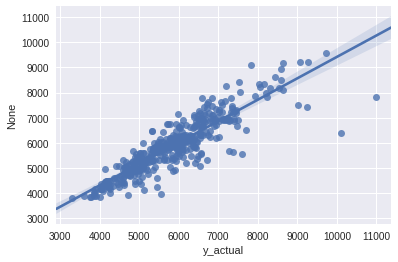

In [63]:
sns.regplot(y_test, y_pred)
plt.show()

In [58]:
list_test = ['X0', 'X2', 'X3', 'qty_options']
list_test = list_test + list_index
list_train = ['y_actual'] + list_test

best_r2 = -1E+80
best_values = {}

df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y_actual']
df_X = df_X.drop('y_actual', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)

for intercept in (True, False):
    model = RidgeCV(alphas=(0.1, 0.3, 0.7, 1.0, 3.0, 7.0, 10.0), fit_intercept = intercept, cv = 5)
    model.fit(X_train, y_train)

    y_pred = pd.Series(model.predict(X_test), index=X_test.index)
    current_r2 =  r2_score(y_test, y_pred)
    if current_r2 > best_r2:
        best_r2 = current_r2; best_values['r2'] = current_r2; best_values['intercept'] = intercept
print 'Best R^2 score: ', best_r2, ' with values: intercept: ', best_values['intercept']

model = RidgeCV(alphas=(0.1, 0.3, 0.7, 1.0, 3.0, 7.0, 10.0), fit_intercept = intercept, cv = 5)
model.fit(X_train, y_train)

y_Kaggle = pd.Series(model.predict(df_Kaggle) / df_test_eng['qty_options'], name='y', index=df_Kaggle.index)

Best R^2 score:  0.813281516833  with values: intercept:  True


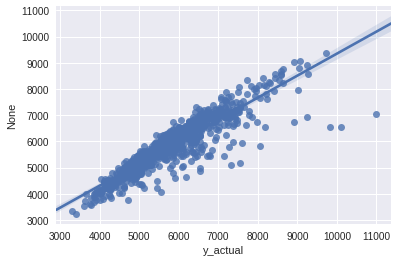

In [59]:
sns.regplot(y_test, y_pred)
plt.show()

In [64]:
list_test = ['X0', 'X2', 'X3', 'qty_options']
list_test = list_test + list_index
list_train = ['y_actual'] + list_test

df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y_actual']
df_X = df_X.drop('y_actual', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=0)

model = ElasticNetCV(cv = 5)
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=X_test.index)
print r2_score(y_test, y_pred)

y_Kaggle = pd.Series(model.predict(df_Kaggle) / df_test_eng['qty_options'], name='y', index=df_Kaggle.index)



0.622223947089


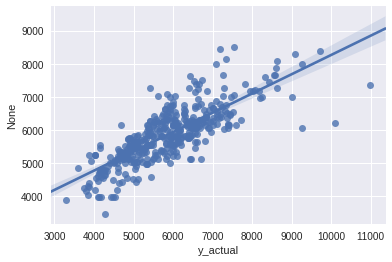

In [65]:
sns.regplot(y_test, y_pred)
plt.show()

In [66]:
list_test = ['X0', 'X2', 'X3', 'qty_options']
list_test = list_test + list_index
list_train = ['y_actual'] + list_test

df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y_actual']
df_X = df_X.drop('y_actual', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=0)

model = LassoCV(cv = 5)
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=X_test.index)
print r2_score(y_test, y_pred)

y_Kaggle = pd.Series(model.predict(df_Kaggle) / df_test_eng['qty_options'], name='y', index=df_Kaggle.index)

0.806584942672


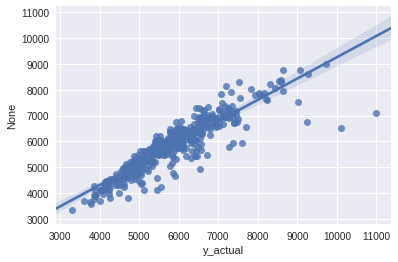

In [67]:
sns.regplot(y_test, y_pred)
plt.show()


In [77]:
list_test = ['X0', 'X2', 'X3', 'qty_options']
list_test = list_test + list_index
list_train = ['y_actual'] + list_test

df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y_actual']
df_X = df_X.drop('y_actual', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=X_test.index)
print r2_score(y_test, y_pred)

#y_Kaggle = pd.Series(model.predict(df_Kaggle) / df_test_eng['qty_options'], name='y', index=df_Kaggle.index)
y_Kaggle = model.predict(df_Kaggle)

0.817618168661


In [82]:
Kaggle = pd.DataFrame()
Kaggle['linearReg'] = y_Kaggle

In [83]:
Kaggle.head(5)

linearReg
0  4095.593031
1  6352.926219
2  4354.334440
3  4532.821926
4  7137.455005

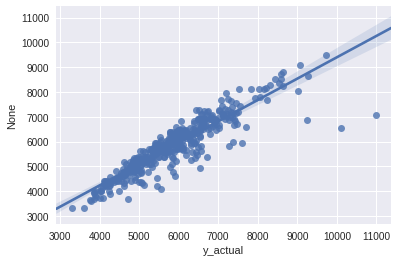

In [70]:
sns.regplot(y_test, y_pred)
plt.show()


In [76]:
list_test = ['X0', 'X2', 'X3', 'qty_options']
list_test = list_test + list_index
list_train = ['y_actual'] + list_test

df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y_actual']
df_X = df_X.drop('y_actual', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=0)

model = MLPRegressor(hidden_layer_sizes=(70, 210, 70))
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=X_test.index)
print r2_score(y_test, y_pred)

y_Kaggle = pd.Series(model.predict(df_Kaggle) / df_test_eng['qty_options'], name='y', index=df_Kaggle.index)


0.802833458874


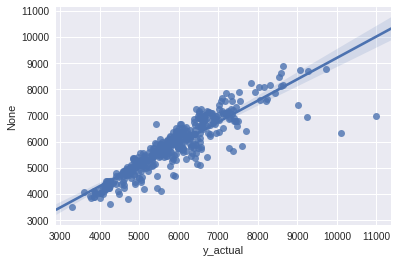

In [75]:
sns.regplot(y_test, y_pred)
plt.show()

In [116]:
list_index = [e for e in list(df_train.columns.values) if e not in {'y_actual', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}]
all_data = pd.concat((df_train[list_index], df_test[list_index]))
value_compliment = {0: 1, 1: 0}

# remove complimentary columns
c = all_data.columns
print('\n Number of columns before cleaning: %d' % len(c))
li_compliments = []
for i in range(len(c)-1):
    v = all_data[c[i]].replace(value_compliment).values
    for j in range(i+1,len(c)):
        if np.array_equal(v,all_data[c[j]].values):
            li_compliments.append(c[j])
            print(' Column %s is complimentary to %s. Removing %s' % (str(c[i]), str(c[j]), str(c[j])))
li_compliments = list(set(li_compliments))
print '\n Number of identified complements marked: %s' % len(li_compliments)

all_data = pd.concat((df_train, df_test))

# remove duplicated columns
c = all_data.columns
print('\n Number of columns before cleaning: %d' % len(c))
li_duplicates = []
for i in range(len(c)-1):
    v = all_data[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,all_data[c[j]].values):
            li_duplicates.append(c[j])
            print(' Column %s is identical to %s. Removing %s' % (str(c[i]), str(c[j]), str(c[j])))
li_duplicates = list(set(li_duplicates))
print '\n Number of identified duplicates marked: %s' % len(li_duplicates)


 Number of columns before cleaning: 368
 Column X128 is complimentary to X130. Removing X130
 Column X156 is complimentary to X157. Removing X157
 Column X204 is complimentary to X205. Removing X205
 Column X232 is complimentary to X263. Removing X263
 Column X263 is complimentary to X279. Removing X279

 Number of identified complements marked: 5

 Number of columns before cleaning: 377
 Column X102 is identical to X214. Removing X214
 Column X102 is identical to X239. Removing X239
 Column X102 is identical to X53. Removing X53
 Column X112 is identical to X199. Removing X199
 Column X113 is identical to X134. Removing X134
 Column X113 is identical to X147. Removing X147
 Column X113 is identical to X222. Removing X222
 Column X113 is identical to X48. Removing X48
 Column X118 is identical to X119. Removing X119
 Column X125 is identical to X227. Removing X227
 Column X134 is identical to X147. Removing X147
 Column X134 is identical to X222. Removing X222
 Column X134 is identica

Random Forest r^2:  0.77214568698


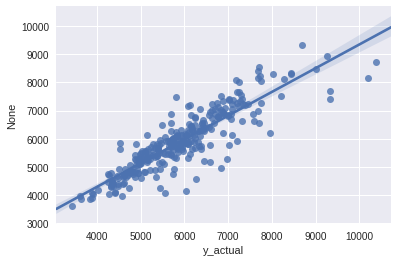

Elastic Net r^2:  0.637016883257


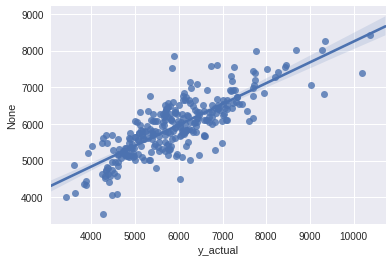

Lasso r^2:  0.819363704031


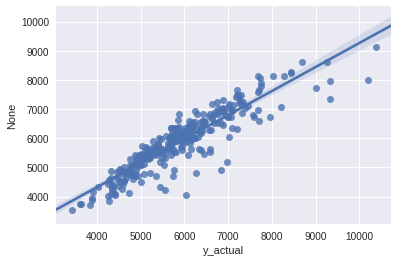

Linear Regression r^2:  -1.3564575862e+16


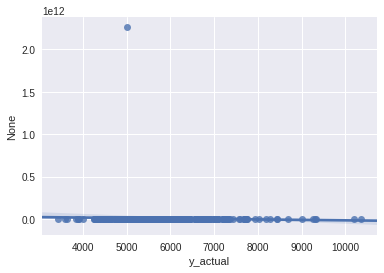

Ridge r^2:  0.825249364847


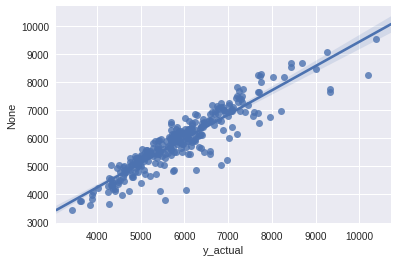

MLP r^2:  0.816256180632


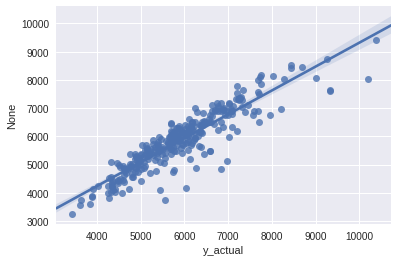

Tier 2 Ridge r^2:  -1.88365861739e+16


In [130]:
list_test = ['X0', 'X2', 'X3', 'qty_options']
#list_index = ['X46', 'X61', 'X64', 'X66', 'X28', 'X27', 'X20', 'X22', 'X171', 'X81', 'X256', 'X156', 'X150', 'X119', 'X294', 'X276', 'X130', 'X115', 'X129', 'X52', 'X76', 'X75', 'X283', 'X166', 'X163', 'X148', 'X374', 'X100', 'X103', 'X209', 'X321', 'X142', 'X147', 'X201', 'X316', 'X336', 'X337', 'X334', 'X313', 'X265', 'X261', 'X263']
list_index = [e for e in list(df_train.columns.values) if e not in list_test]
list_index = [e for e in list_index if e not in li_compliments + li_duplicates + ['y', 'y_actual']]
list_test = list_test + list_index
list_train = ['y_actual'] + list_test

df_X = df_train_eng[list_train]
#df_Kaggle = df_test_eng[list_test]
df_y = df_X['y_actual']
df_X = df_X.drop('y_actual', axis=1)
X2_T2_train = pd.DataFrame()
X2_T2_test = pd.DataFrame()
result = pd.DataFrame()

X2_train, X2_test, y2_train, y2_test = train_test_split(df_X, df_y, test_size=0.3, random_state=987)
X2_T2_train['qty_options'] = X2_train['qty_options']
X2_T2_test['qty_options'] = X2_test['qty_options']
result['y_actual'] = y2_test

X_train, X_test, y_train, y_test = train_test_split(X2_train, y2_train, test_size=0.1, random_state=0)
model = RandomForestRegressor(n_estimators = 80)
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
print 'Random Forest r^2: ', r2_score(y_test, y_pred)
X2_T2_train['ranFor'] = model.predict(X2_train)
X2_T2_test['ranFor'] = model.predict(X2_test)
result['ranFor'] = X2_T2_test['ranFor']
sns.regplot(y_test, y_pred)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X2_train, y2_train, test_size=0.1, random_state=0)
model = ElasticNetCV(cv = 5)
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
print 'Elastic Net r^2: ', r2_score(y_test, y_pred)
X2_T2_train['elastNet'] = model.predict(X2_train)
X2_T2_test['elastNet'] = model.predict(X2_test)
result['elastNet'] = X2_T2_test['elastNet']
sns.regplot(y_test, y_pred)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X2_train, y2_train, test_size=0.1, random_state=0)
model = LassoCV(cv = 5)
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
print 'Lasso r^2: ', r2_score(y_test, y_pred)
X2_T2_train['Lasso'] = model.predict(X2_train)
X2_T2_test['Lasso'] = model.predict(X2_test)
result['Lasso'] = X2_T2_test['Lasso']
sns.regplot(y_test, y_pred)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X2_train, y2_train, test_size=0.1, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
print 'Linear Regression r^2: ', r2_score(y_test, y_pred)
X2_T2_train['linearReg'] = model.predict(X2_train)
X2_T2_test['linearReg'] = model.predict(X2_test)
result['linearReg'] = X2_T2_test['linearReg']
sns.regplot(y_test, y_pred)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X2_train, y2_train, test_size=0.1, random_state=0)
model = RidgeCV(alphas=(0.1, 0.3, 0.7, 1.0, 3.0, 7.0, 10.0), fit_intercept = True, cv = 5)
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
print 'Ridge r^2: ', r2_score(y_test, y_pred)
X2_T2_train['Ridge'] = model.predict(X2_train)
X2_T2_test['Ridge'] = model.predict(X2_test)
result['Ridge'] = X2_T2_test['Ridge']
sns.regplot(y_test, y_pred)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X2_train, y2_train, test_size=0.1, random_state=0)
model = MLPRegressor(hidden_layer_sizes=(70, 210, 70))
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
print 'MLP r^2: ', r2_score(y_test, y_pred)
X2_T2_train['MLP'] = model.predict(X2_train)
X2_T2_test['MLP'] = model.predict(X2_test)
result['MLP'] = X2_T2_test['MLP']
sns.regplot(y_test, y_pred)
plt.show()

#model = RidgeCV(alphas=(0.1, 0.3, 0.7, 1.0, 3.0, 7.0, 10.0), fit_intercept = True, cv = 5)
model = MLPRegressor(hidden_layer_sizes=(70, 210, 70))
#model = LinearRegression()
model.fit(X2_T2_train, y2_train)
y2_pred = pd.Series(model.predict(X2_T2_test), index=X2_T2_test.index)
print 'Tier 2 Ridge r^2: ', r2_score(y2_test, y2_pred)

#regr_1 = DecisionTreeRegressor(max_depth=4)
#regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
#                          n_estimators=300, random_state=999)
#regr_1.fit(X2_T2_train, y2_train)
#regr_2.fit(X2_T2_train, y2_train)

# Predict
#y_1 = regr_1.predict(X2_T2_test)
#y2_pred = pd.Series(regr_2.predict(X2_T2_test), index=X2_T2_test.index)
result['pred'] = y2_pred



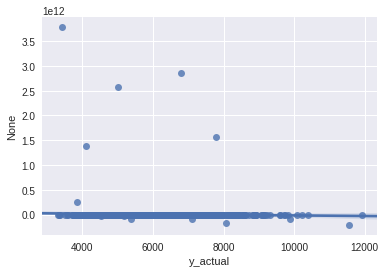

In [131]:
sns.regplot(y2_test, y2_pred)
plt.show()

In [135]:
result.head(15)

y_actual       ranFor     elastNet        Lasso    linearReg  \
910    6541.33  6755.370125  5987.216064  6509.010291  7077.625000   
2319   6031.35  5925.085250  6470.263821  6332.752367  6160.000000   
1216   5783.98  5740.634896  6269.035965  6039.949820  6020.687500   
459    5869.02  5443.840437  5790.264667  5609.189570  5604.453125   
915    4595.76  4801.430125  5187.437663  4890.561070  4887.296875   
189    4213.92  4454.793867  4779.130052  4334.689181  4381.468750   
2125   5309.28  4868.268375  5371.280593  5114.750160  5179.765625   
963    5601.70  6443.135054  6227.974421  5912.011527  5821.375000   
823    7550.98  7008.192500  6353.002509  6837.496331  6907.109375   
1612   7419.84  7219.852625  6083.266622  6705.808309  6931.796875   
1654   4217.28  5093.589989  4732.591614  4352.442662  4541.312500   
3274   5358.60  5581.338500  5954.317501  5686.158869  5600.421875   
648    6709.56  5039.321900  5211.920718  5423.757349  5225.734375   
3892   4736.61  4906.715125  5282.342224  4973.525788  4742.390625   
3003   5779.12  5950.662000  5908.363705  6143.220385  6107.078125   

            Ridge          MLP         pred  
910   6724.461632  6536.289904  6656.403263  
2319  6191.175864  6229.568019  6592.448423  
1216  6044.680995  6074.085987  6369.563340  
459   5625.348466  5544.556105  5933.990075  
915   4895.536873  4846.183660  5249.508900  
189   4403.066061  4410.535790  4811.352690  
2125  5172.370502  5130.571844  5414.387398  
963   5777.180732  5808.936496  6545.480114  
823   6923.794903  6840.651602  7075.538667  
1612  6945.342390  6894.013547  7012.985921  
1654  4517.659551  4460.765402  5018.750107  
3274  5613.184280  5603.737080  6070.036485  
648   5258.496680  5256.665105  5492.576675  
3892  4825.426400  4866.573496  5362.051671  
3003  6131.706830  6114.451813  6318.198846

In [134]:
result.to_csv(path_or_buf='../data/result.csv', index_label='ID', header = True)

After some very simplistic experementing in excel with this csv file, let's take it to the next level:

In [165]:
def compute_y(model, frameName, frames):
    X_train, X_test, y_train, y_test = train_test_split(X2_train, y2_train, test_size=0.3, random_state=0)
    model.fit(X_train, y_train)
    y_pred = pd.Series(model.predict(X_test), index=X_test.index)
    print frameName, ' r^2: ', r2_score(y_test, y_pred)
    X2_T2_train[frameName] = model.predict(X2_train)
    X2_T2_test[frameName] = model.predict(X2_test)
    y_Kaggle[frameName] = model.predict(df_Kaggle)
    result[frameName] = X2_T2_test[frameName]
    frames = frames + [frameName]
    sns.regplot(y_test, y_pred)
    plt.show()
    return frames
    

Random Forest  r^2:  0.783615261225


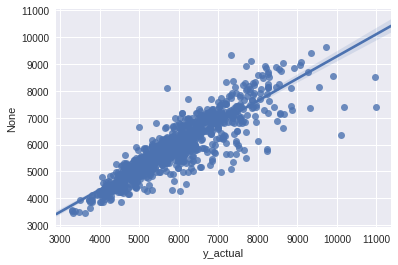

Elastic Net  r^2:  0.619649444831


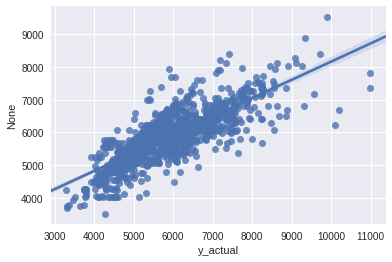

Lasso  r^2:  0.802611243063


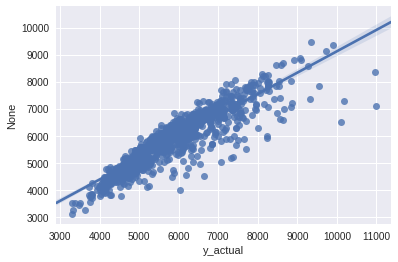

Ridge  r^2:  0.808245427423


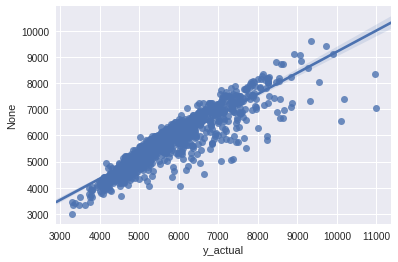

MLP  r^2:  0.789475088705


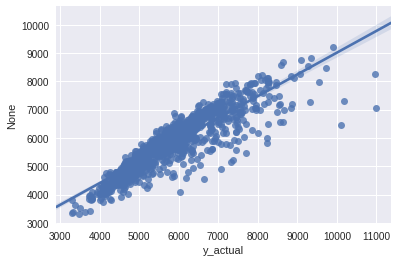

Tier 2 mean:  0.835652044347


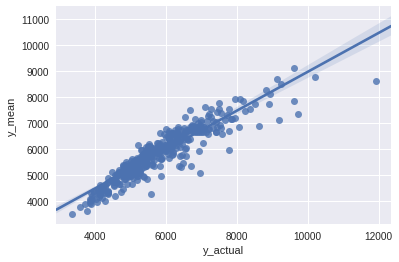

In [375]:
list_test = ['X0', 'X2', 'X3', 'qty_options']
#list_index = ['X46', 'X61', 'X64', 'X66', 'X28', 'X27', 'X20', 'X22', 'X171', 'X81', 'X256', 'X156', 'X150', 'X119', 'X294', 'X276', 'X130', 'X115', 'X129', 'X52', 'X76', 'X75', 'X283', 'X166', 'X163', 'X148', 'X374', 'X100', 'X103', 'X209', 'X321', 'X142', 'X147', 'X201', 'X316', 'X336', 'X337', 'X334', 'X313', 'X265', 'X261', 'X263']
list_index = ['X46', 'X64', 'X29', 'X28', 'X20', 'X22', 'X171', 'X256', 'X158', 'X154', 'X150', 'X118', 'X136', 'X111', 'X116', 'X115', 'X129', 'X75', 'X127', 'X100', 'X163', 'X148', 'X224', 'X166', 'X103', 'X209', 'X283', 'X108', 'X314', 'X337', 'X334', 'X313', 'X264', 'X265', 'X261', 'X120']
#list_index = [e for e in list(df_train.columns.values) if e not in list_test]
list_index = [e for e in list_index if e not in li_compliments + li_duplicates + ['y', 'y_actual']]
list_test = list_test + list_index
list_train = ['y_actual'] + list_test

df_X = df_train_eng[list_train]
df_Kaggle = df_test_eng[list_test]
df_y = df_X['y_actual']
df_X = df_X.drop('y_actual', axis=1)
X2_T2_train = pd.DataFrame()
X2_T2_test = pd.DataFrame()
y_Kaggle = pd.DataFrame()
result = pd.DataFrame()
frames = []

X2_train, X2_test, y2_train, y2_test = train_test_split(df_X, df_y, test_size=0.1, random_state=987)
X2_T2_train['qty_options'] = X2_train['qty_options']
X2_T2_test['qty_options'] = X2_test['qty_options']
y_Kaggle['qty_options'] = df_Kaggle['qty_options']
result['qty_options'] = X2_test['qty_options']
result['y_actual'] = y2_test

model = RandomForestRegressor(n_estimators = 80)
frames = compute_y(model, 'Random Forest', frames)

model = ElasticNetCV(cv = 5)
frames = compute_y(model, 'Elastic Net', frames)

model = LassoCV(cv = 5)
frames = compute_y(model, 'Lasso', frames)

#model = LinearRegression()
#frames = compute_y(model, 'linear Regression', frames)

model = RidgeCV(alphas=(0.1, 0.3, 0.7, 1.0, 3.0, 7.0, 10.0), fit_intercept = True, cv = 5)
frames = compute_y(model, 'Ridge', frames)

model = MLPRegressor(hidden_layer_sizes=(70, 210, 70))
frames = compute_y(model, 'MLP', frames)

result['y_mean'] = result[frames].mean(axis=1)
y_Kaggle['y_mean'] = y_Kaggle[frames].mean(axis=1)

print 'Tier 2 mean: ', r2_score(result['y_actual'], result['y_mean'])

sns.regplot(result['y_actual'], result['y_mean'])
plt.show()


output_Kaggle = pd.Series(y_Kaggle['y_mean'] / y_Kaggle['qty_options'], name='y', index=y_Kaggle.index)
output_Kaggle.to_csv(path='../data/201706131715.mean.csv', index_label='ID', header = True)

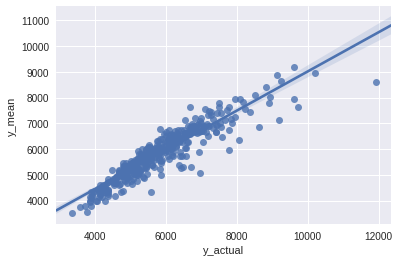

In [170]:
sns.regplot(result['y_actual'], result['y_mean'])
plt.show()


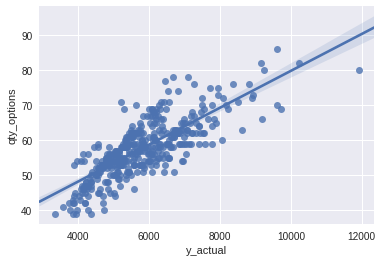

In [171]:
sns.regplot(result['y_actual'], result['qty_options'])
plt.show()

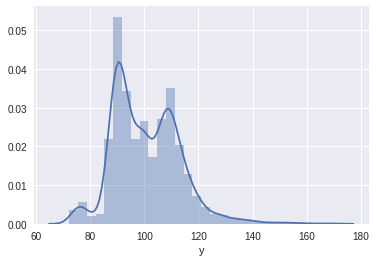

In [177]:
sns.distplot(df_train_eng['y'], bins = 30)
plt.show()

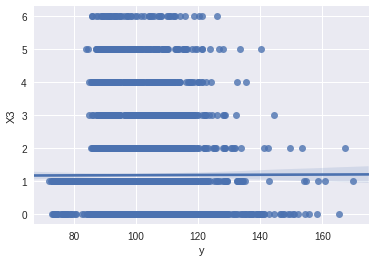

In [180]:
sns.regplot(df_train_eng['y'], df_train_eng['X3'])
plt.show()

X3 =  0


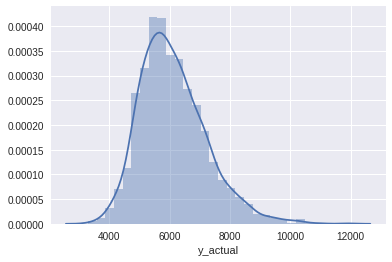

X3 =  1


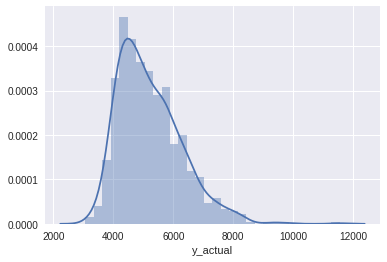

X3 =  2


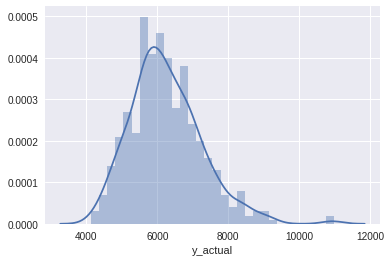

X3 =  3


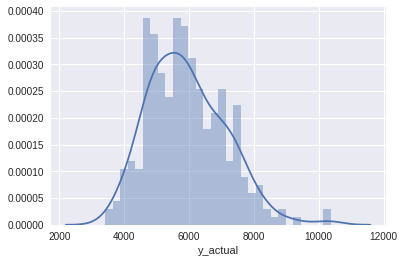

X3 =  4


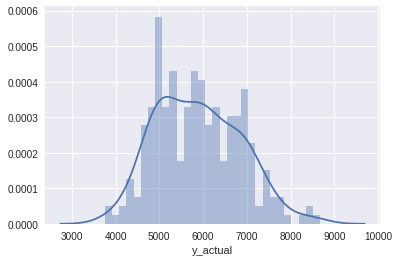

X3 =  5


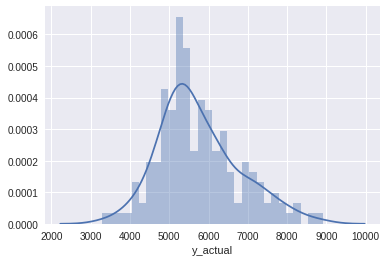

X3 =  6


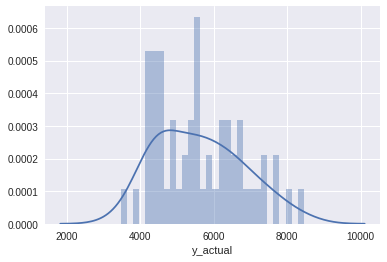

In [190]:
for i in range(7):
    print 'X3 = ', i
    sns.distplot(df_train_eng[(df_train_eng['X3'] == i)]['y_actual'], bins = 30)
    plt.show()

X3 =  2


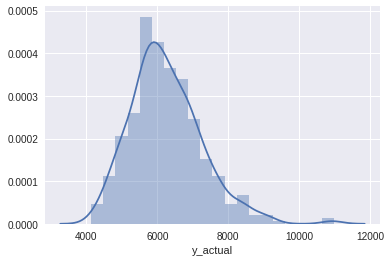

X3 =  3


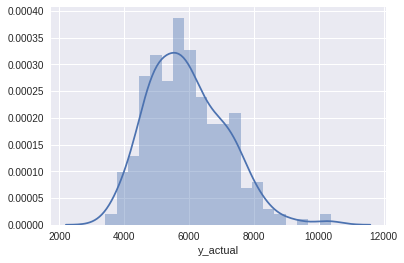

X3 =  4


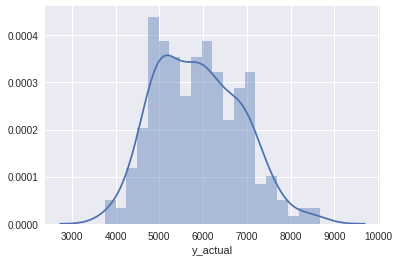

X3 =  5


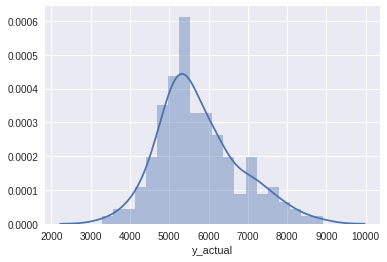

X3 =  6


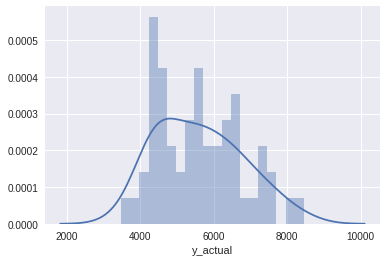

In [338]:
for i in range(2,7):
    print 'X3 = ', i
    sns.distplot(df_train_eng[(df_train_eng['X3'] == i)]['y_actual'], bins = 20)
    plt.show()

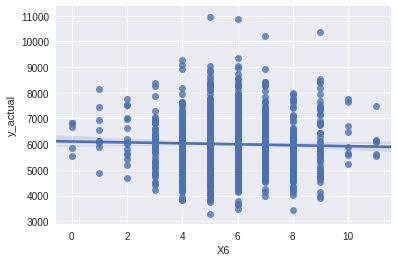

X6 =  0


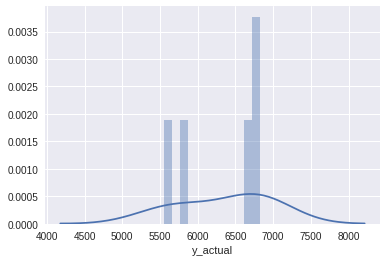

X6 =  1


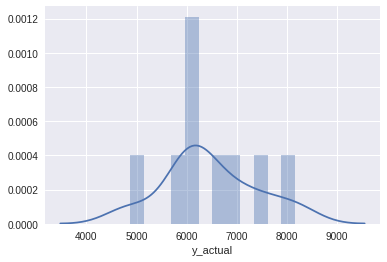

X6 =  2


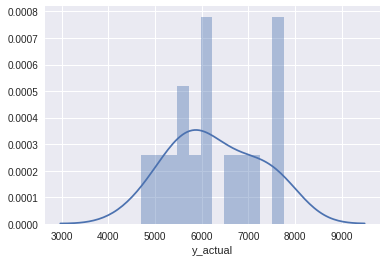

X6 =  3


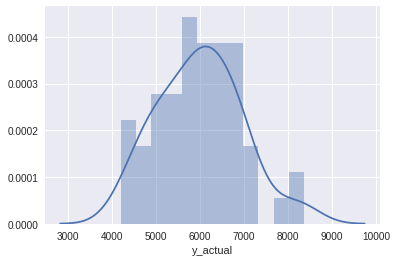

X6 =  4


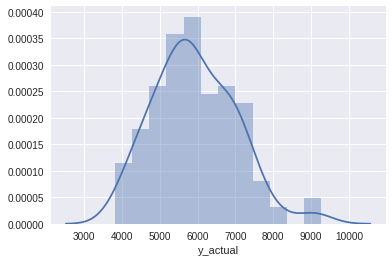

X6 =  5


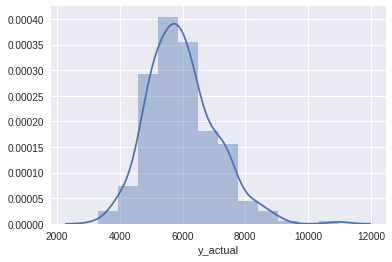

X6 =  6


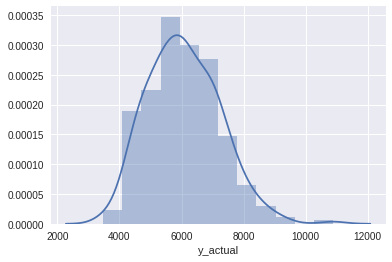

X6 =  7


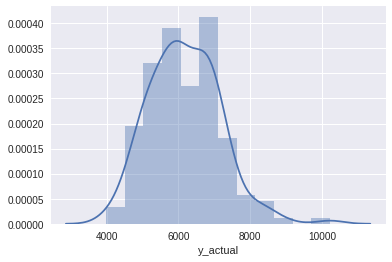

X6 =  8


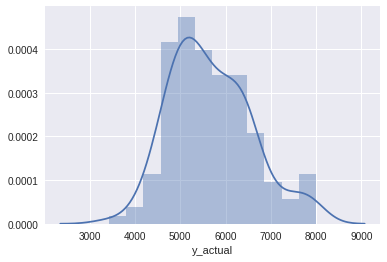

X6 =  9


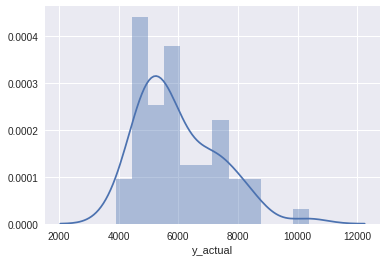

X6 =  10


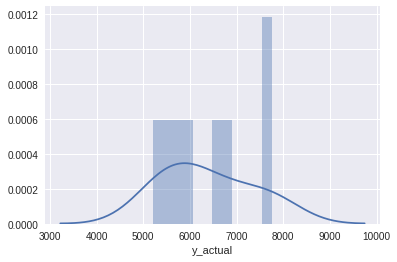

X6 =  11


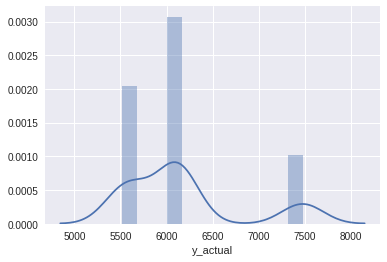

In [207]:
df = df_train_eng[(df_train_eng['X3'] >= 2)].copy()
sns.regplot(df['X6'], df['y_actual'])
plt.show()
for i in range(12):
    print 'X6 = ', i
    sns.distplot(df[(df['X6'] == i)]['y_actual'], bins = 12)
    plt.show()

X6 <= 2


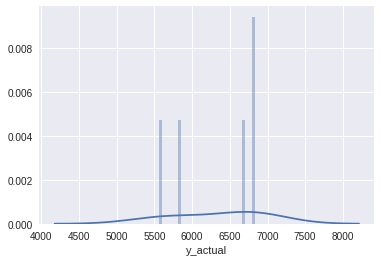

In [204]:
df = df_train_eng[(df_train_eng['X3'] >= 2)].copy()
print 'X6 <= 2' 
sns.distplot(df[(df['X6'] <= 0)]['y_actual'], bins = 30)
plt.show()

In [344]:
df_train[(df_train['y'] >= 130)].shape

(81, 377)

In [348]:
df_train['X3'].unique()

array(['a', 'e', 'c', 'f', 'd', 'b', 'g'], dtype=object)

In [353]:
list_temp = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
list_value = list(string.lowercase) + list('a' + x for x in list(string.lowercase)) + ['ba', 'bb', 'bc']
i = 0
value_to_int = {}
for j in list_value:
    value_to_int[j] = i
    i += 1
df_display = df_train.replace(value_to_int).copy()

df_interest = df_display[(df_train['y'] >= 130)].copy()
df_interest = df_interest[((df_interest['X3'] == 0) | (df_interest['X3'] == 2) | (df_interest['X3'] == 5))]
c = df_interest.columns
interesting_columns = []
int
print('\n Number of columns before evaluation: %d' % len(c))
for i in range(len(c)-1):
    v = df_interest[c[i]].sum()
    if v == df_interest.shape[0]:
        interesting_columns.append(c[i])
        print(' Column %s is all ones' % (str(c[i])))
print interesting_columns


 Number of columns before evaluation: 377
 Column X74 is all ones
 Column X263 is all ones
['X74', 'X263']


In [354]:
df_interest.shape

(75, 377)

In [355]:
df_interest_low = df_interest.copy()
c = df_interest_low.columns
interesting_columns_low = []
int
print('\n Number of columns before evaluation: %d' % len(c))
for i in range(len(c)-1):
    v = df_interest_low[c[i]].sum()
    if v == 0:
        interesting_columns_low.append(c[i])
        print(' Column %s is all zeroes' % (str(c[i])))
print interesting_columns_low


 Number of columns before evaluation: 377
 Column X10 is all zeroes
 Column X11 is all zeroes
 Column X15 is all zeroes
 Column X17 is all zeroes
 Column X24 is all zeroes
 Column X26 is all zeroes
 Column X28 is all zeroes
 Column X29 is all zeroes
 Column X30 is all zeroes
 Column X32 is all zeroes
 Column X33 is all zeroes
 Column X36 is all zeroes
 Column X39 is all zeroes
 Column X40 is all zeroes
 Column X41 is all zeroes
 Column X42 is all zeroes
 Column X44 is all zeroes
 Column X53 is all zeroes
 Column X55 is all zeroes
 Column X59 is all zeroes
 Column X60 is all zeroes
 Column X67 is all zeroes
 Column X83 is all zeroes
 Column X87 is all zeroes
 Column X88 is all zeroes
 Column X89 is all zeroes
 Column X90 is all zeroes
 Column X91 is all zeroes
 Column X92 is all zeroes
 Column X93 is all zeroes
 Column X94 is all zeroes
 Column X95 is all zeroes
 Column X97 is all zeroes
 Column X99 is all zeroes
 Column X102 is all zeroes
 Column X105 is all zeroes
 Column X106 is all

At beginning:  100.630190114
After all ones:  101.644604871
After all zeros:  101.721528029
After quantity options:  102.030535484


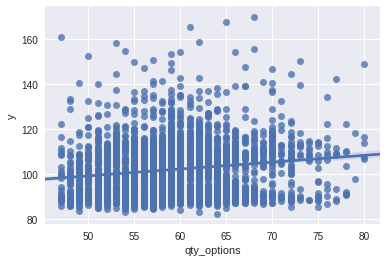

After X2:  111.694899329


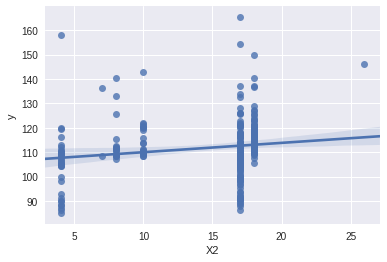

After X6:  112.873809524


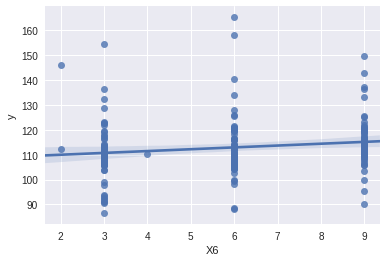

After X0:  117.684


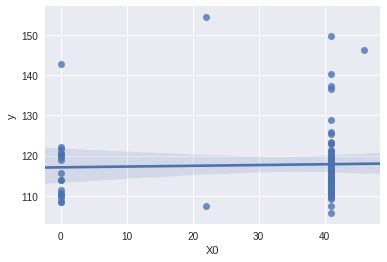

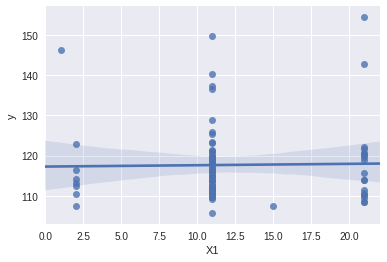

After X1:  118.165974026


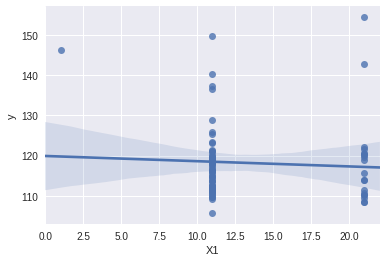

(77, 378)
After X3:  118.680757576


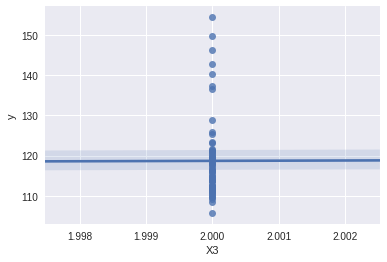

After X5:  120.047692308


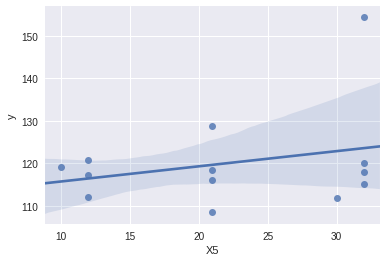

After X8:  154.43


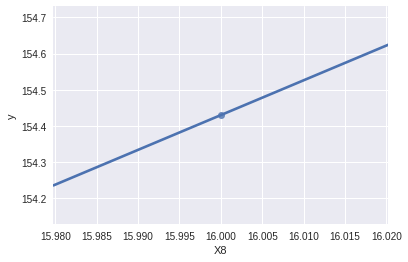

(1, 378)

In [374]:
df_highs = df_train.copy()
list_temp = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
list_value = list(string.lowercase) + list('a' + x for x in list(string.lowercase)) + ['ba', 'bb', 'bc']
i = 0
value_to_int = {}
for j in list_value:
    value_to_int[j] = i
    i += 1
df_highs = df_highs.replace(value_to_int).copy()

print 'At beginning: ', df_highs['y'].mean()
for i in interesting_columns:
    df_highs = df_highs[(df_highs[i] == 1)]
print 'After all ones: ', df_highs['y'].mean()
for i in interesting_columns_low:
    df_highs = df_highs[(df_highs[i] == 0)]
print 'After all zeros: ', df_highs['y'].mean()
li_columnNames = ['y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
li_columnNamesHighs = [e for e in list(df_highs.columns.values) if e not in li_columnNames]
df_highs['qty_options'] = df_highs[li_columnNamesHighs].sum(axis=1)
#df_highs = df_highs[(df_highs['qty_options'] >= 60)]
#print 'After qty_options >= 60: ', df_highs['y'].mean()

#sns.regplot(df_highs['qty_options'], df_highs['y'])
#plt.show()
li_qOpt = range(47, 81)
df_temp = df_highs[:0].copy()
for i in li_qOpt:
    df_temp = df_temp.append(df_highs[(df_highs['qty_options'] == i)])
df_highs = df_temp.copy()
print 'After quantity options: ', df_highs['y'].mean()
sns.regplot(df_highs['qty_options'], df_highs['y'])
plt.show()

#sns.regplot(df_highs['X2'], df_highs['y'])
#plt.show()
li_X2 = [4, 7, 8, 10, 17, 18, 26]
df_temp = df_highs[:0].copy()
for i in li_X2:
    df_temp = df_temp.append(df_highs[(df_highs['X2'] == i)])
df_highs = df_temp.copy()
print 'After X2: ', df_highs['y'].mean()
sns.regplot(df_highs['X2'], df_highs['y'])
plt.show()

#sns.regplot(df_highs['X6'], df_highs['y'])
#plt.show()
li_X6 = [2, 3, 4, 6, 9]
df_temp = df_highs[:0].copy()
for i in li_X6:
    df_temp = df_temp.append(df_highs[(df_highs['X6'] == i)])
df_highs = df_temp.copy()
print 'After X6: ', df_highs['y'].mean()
sns.regplot(df_highs['X6'], df_highs['y'])
plt.show()

#sns.regplot(df_highs['X0'], df_highs['y'])
#plt.show()
li_X0 = [0, 22, 41, 46]
df_temp = df_highs[:0].copy()
for i in li_X0:
    df_temp = df_temp.append(df_highs[(df_highs['X0'] == i)])
df_highs = df_temp.copy()
print 'After X0: ', df_highs['y'].mean()
sns.regplot(df_highs['X0'], df_highs['y'])
plt.show()

sns.regplot(df_highs['X1'], df_highs['y'])
plt.show()
li_X1 = [1, 11, 21]
df_temp = df_highs[:0].copy()
for i in li_X1:
    df_temp = df_temp.append(df_highs[(df_highs['X1'] == i)])
df_highs = df_temp.copy()
print 'After X1: ', df_highs['y'].mean()
sns.regplot(df_highs['X1'], df_highs['y'])
plt.show()

print df_highs.shape


#sns.regplot(df_highs['X3'], df_highs['y'])
#plt.show()
li_X3 = [2, 5]
df_temp = df_highs[:0].copy()
for i in li_X3:
    df_temp = df_temp.append(df_highs[(df_highs['X3'] == i)])
df_highs = df_temp.copy()
print 'After X3: ', df_highs['y'].mean()
sns.regplot(df_highs['X3'], df_highs['y'])
plt.show()

#sns.regplot(df_highs['X5'], df_highs['y'])
#plt.show()
li_X5 = [10, 12, 21, 30, 32]
df_temp = df_highs[:0].copy()
for i in li_X5:
    df_temp = df_temp.append(df_highs[(df_highs['X5'] == i)])
df_highs = df_temp.copy()
print 'After X5: ', df_highs['y'].mean()
sns.regplot(df_highs['X5'], df_highs['y'])
plt.show()

#sns.regplot(df_highs['X8'], df_highs['y'])
#plt.show()
li_X8 = [3, 16, 17, 23]
df_temp = df_highs[:0].copy()
for i in li_X8:
    df_temp = df_temp.append(df_highs[(df_highs['X8'] == i)])
df_highs = df_temp.copy()
print 'After X8: ', df_highs['y'].mean()
sns.regplot(df_highs['X8'], df_highs['y'])
plt.show()


df_highs.shape

(2, 378)


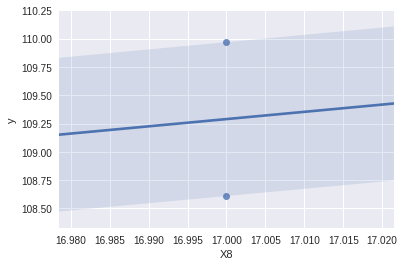

In [356]:
threshold = 130
print df_highs[(df_highs['y'] < threshold)].shape
#df_highs[(df_highs['y'] < threshold)]['X5'].value_counts()
sns.regplot(df_highs[(df_highs['y'] < threshold)]['X8'], df_highs[(df_highs['y'] < threshold)]['y'])
plt.show()

In [357]:
li_columnNames = ['y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'qty_options']
li_columnNamesHighs = [e for e in list(df_interest_low.columns.values) if e not in li_columnNames]
df_interest_low['qty_options'] = df_interest_low[li_columnNamesHighs].sum(axis=1)


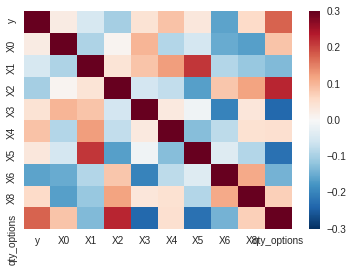

In [361]:
corr = df_interest_low[li_columnNames].corr()
sns.heatmap(corr, vmax=.3)
plt.show()

In [359]:
df_interest_low[li_columnNames].head(20)

y  X0  X1  X2  X3  X4  X5  X6  X8  qty_options
0     130.81  10  21  45   0   3  20   9  14           52
43    139.20  22  18  44   2   3   9   8  16           66
203   136.41  22  18  44   2   3   8   8  22           55
216   146.83  23   8  44   2   3   8   6  11           70
227   134.43  26  21  36   5   3   8   7  21           60
253   150.43  19   1  44   2   3   8  11  23           73
342   169.91  26  11  36   5   3   8   2   3           68
420   136.47  23   1   7   2   3   3   9  16           65
429   154.87  36  11  30   5   3   3   6  22           54
523   134.26  45   1  42   2   3   3   8  14           76
648   131.56  50   8  44   2   3   2  11  10           51
668   130.97  36  18  44   2   3   2   7   0           61
681   147.72  23   8  30   2   3   2   6  24           67
698   132.59  36  11  17   5   3  31   3   1           55
846   140.49  23  26   8   2   3  31  11   2           49
889   158.53  35  11  44   5   3  32  10   4           62
900   141.31  23  26  44   2   3  32   9   9           57
995   140.15  23   1  12   2   3  32   9   9           57
998   137.44   9  17  30   2   3  32   8  14           53
1060  154.43  22  21  17   2   3  32   3  16           66

In [278]:
df_train_eng['qty_options'].min()

31

In [279]:
df_interest_low['qty_options'].min()

47